# used case name: 
    polytrope: '../../data/planetary_engulfment_test8/'
    solar-type: '../../data/planetary_engulfment_test28/'
    giant: '../../data/planetary_engulfment_test26/'
    
    **======================**
    version 241114 foucs on only giant star case


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure
import scipy

from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf
import light_curve_modified as lc
from scipy.signal import find_peaks


c=Constants.Constants()

%matplotlib inline




Constants defined...
Constants defined...


In [2]:
# load the files and the characteristics
polytrope = '../../data/planetary_engulfment_test7/'
solar = '../../data/planetary_engulfment_test35/'
giant = '../../data/planetary_engulfment_test39/'
orb_polytrope = ou.read_trackfile(polytrope+"pm_trackfile.dat")
orb_solar = ou.read_trackfile(solar+"pm_trackfile.dat")
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

r_polytrope = c.rsun
r_solar = 8.16e10
r_giant = 7.e12
t_dyn_polytrope = (r_polytrope**3/c.G/c.msun)**0.5
t_dyn_solar = (r_solar**3/c.G/c.msun)**0.5
t_dyn_giant = (r_giant**3/c.G/c.msun)**0.5

gamma = 5/3

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


In [15]:
5e5*20/t_dyn_giant

6.221046287371682

In [3]:
import matplotlib as mpl

mpl.rcParams.update({
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "mathtext.default": "regular",
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "axes.unicode_minus": True,
    
    # Log scale specific additions
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.minor.width": 0.8,
    "ytick.minor.width": 0.8,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
})
%matplotlib inline


In [7]:
mpl.rcParams.update(mpl.rcParamsDefault)


reading orbit file for binary simulation...


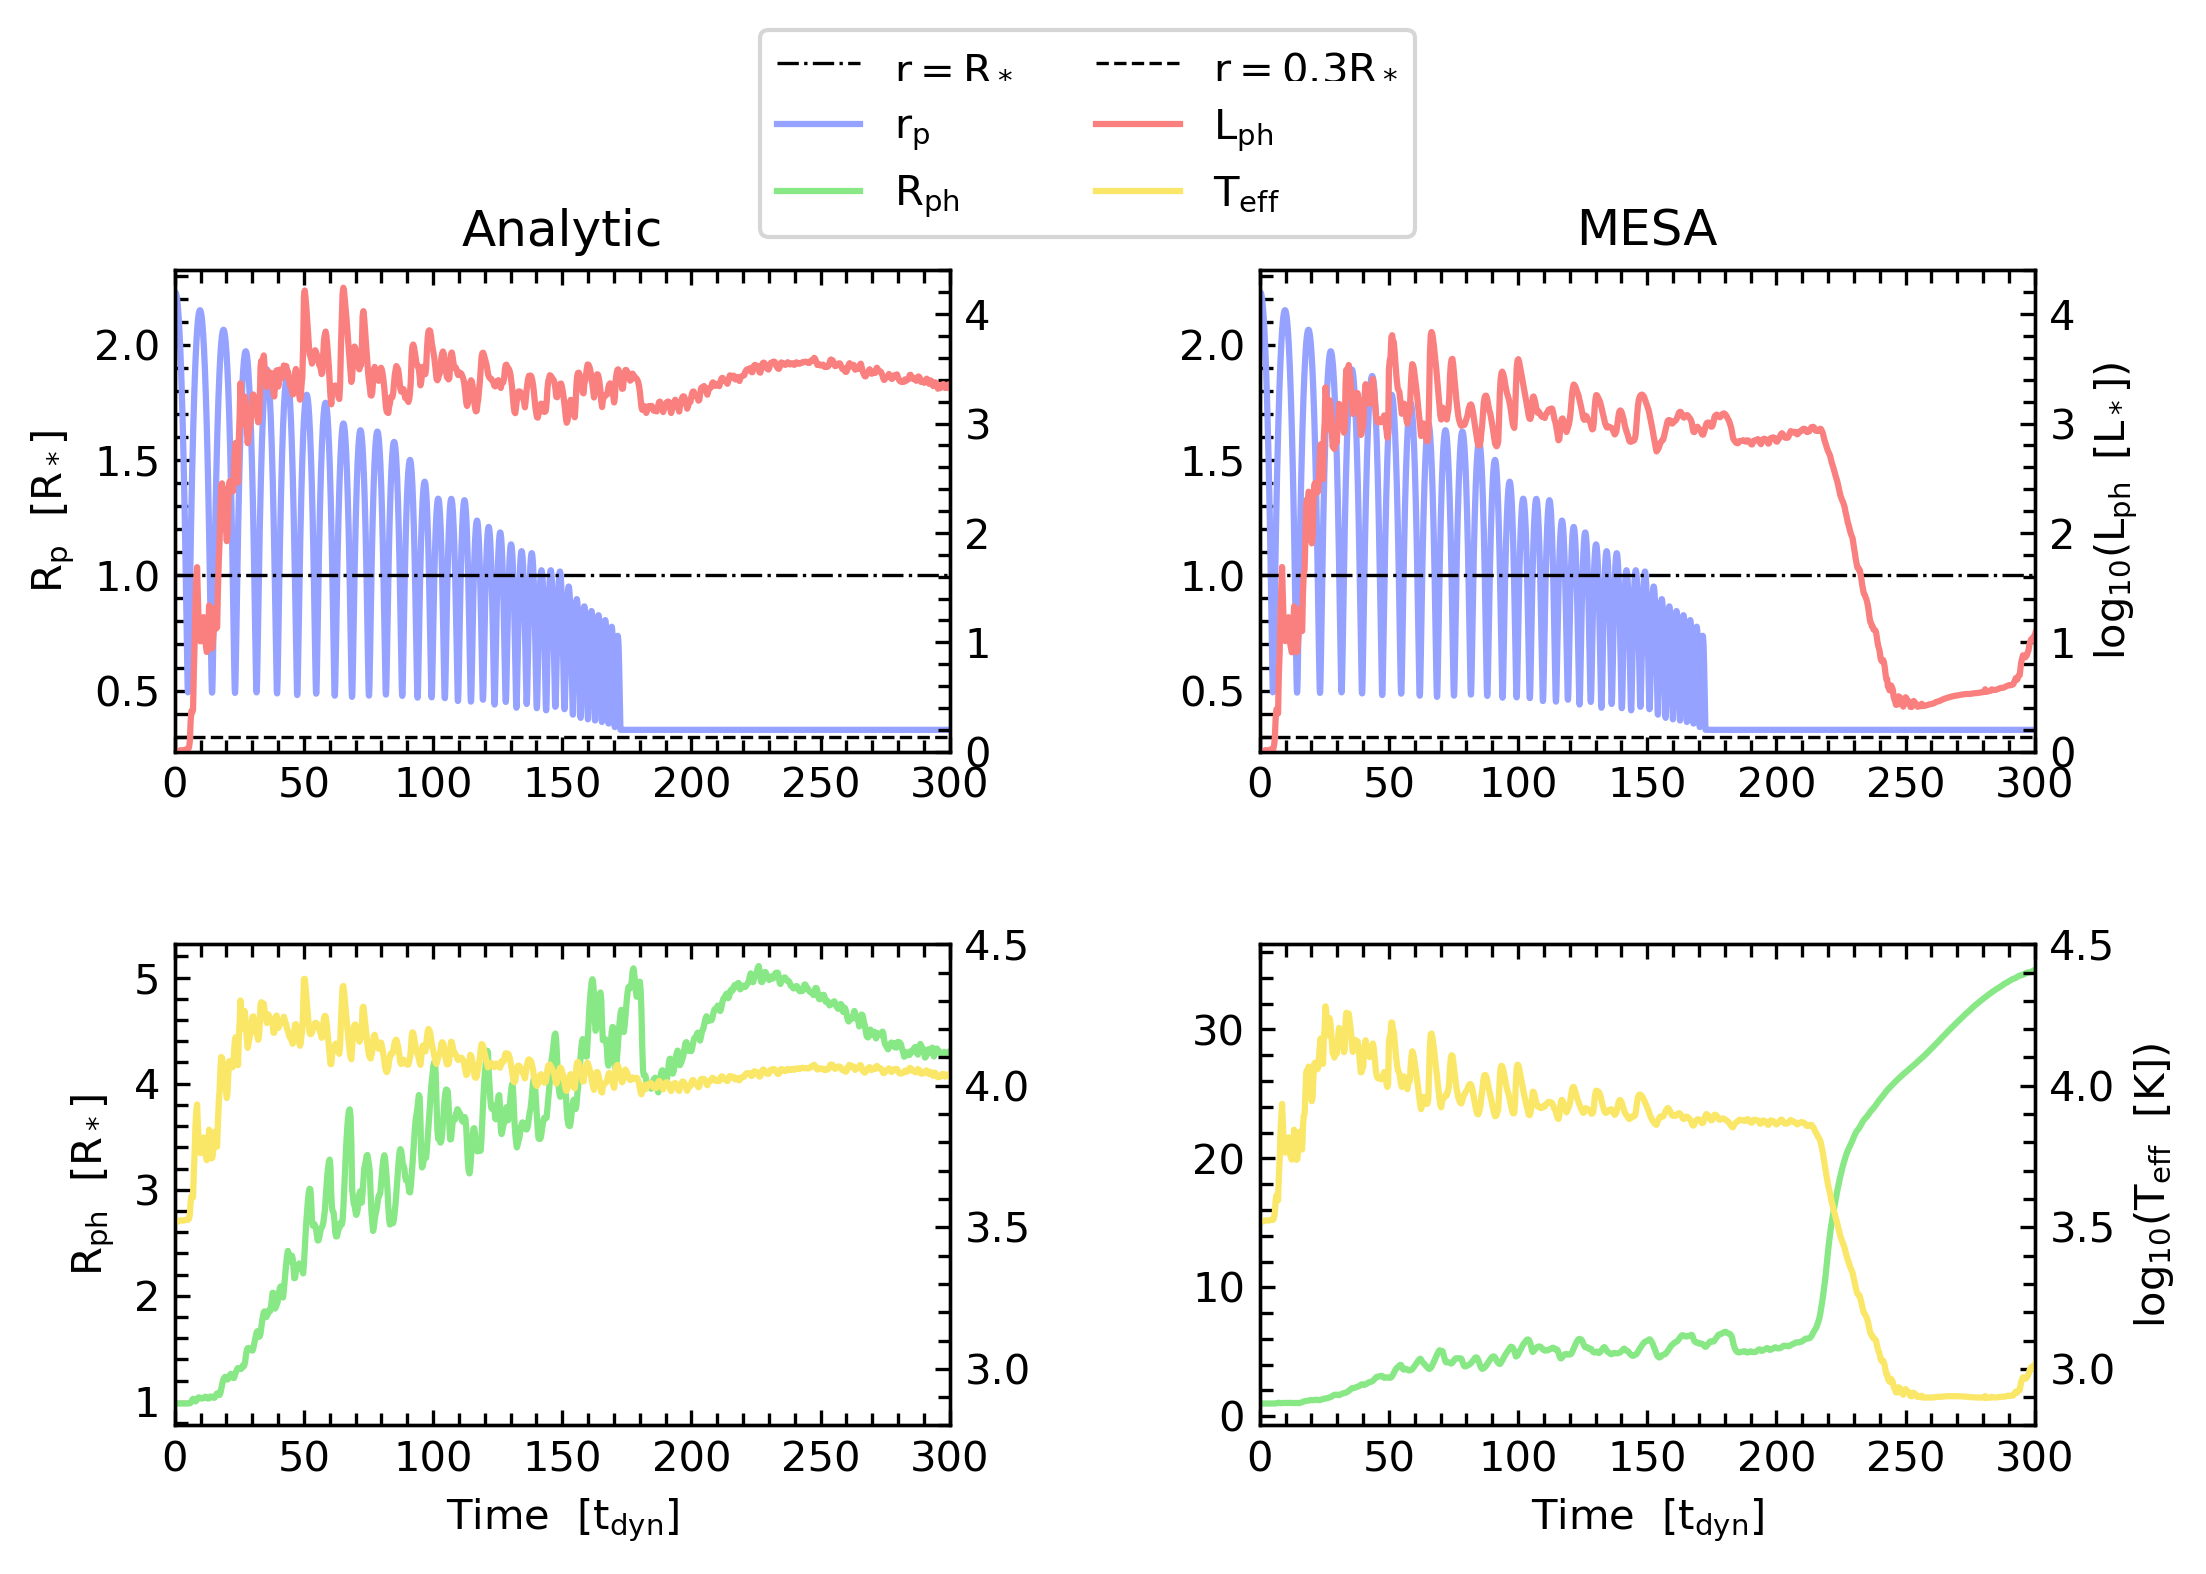

In [4]:
fig = plt.figure(figsize=(8,5), dpi=300)
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.4)
(ax1, ax3), (ax2, ax4) = gs.subplots()

# load light curve data for analytical and mesa opacity models
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
data_lc_ana =np.loadtxt('PEGMfig/test39_lc_ana.dat')
data_lc_mesa=np.loadtxt('PEGMfig/test39_lc.dat')
time_lc_ana =data_lc_ana[:,0]; int_lum_ana =data_lc_ana[:,1]; radii_aver_ana=data_lc_ana[:,2]
temp_aver_ana=data_lc_ana[:,3];rho_aver_ana=data_lc_ana[:,4]
time_lc_mesa=data_lc_mesa[:,0]; int_lum_mesa=data_lc_mesa[:,1]; radii_aver_mesa=data_lc_mesa[:,2]
temp_aver_mesa=data_lc_mesa[:,3];rho_aver_ana=data_lc_mesa[:,4]

#########################################################################################################
# Figure 1, analytical model luminosity and orbital distance of the planet (analytical opacity model).
#########################################################################################################
ax1_r = ax1.twinx()
ax1.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff')
ax1_r.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.log10(np.array(int_lum_ana)/int_lum_ana[20]),'#fa8080', label=r'$LC$')

ax1.set_title('Analytic')
ax1.set_ylabel(r'$R_p \ \ [R_*]$', fontsize=10)
ax1.set_xlim(0,300)
ax1_r.set_ylim(0,4.4)

# Add lengends
ax1.axhline(y=1, color='#000000', linestyle='-.', lw=0.8,label=r'$r=R_*$')
ax1.axvline(x=1e4, color='#95a2ff',label=r'$r_p$')
ax1.axvline(x=1e4, color='#87e885',label=r'$R_{ph}$')
ax1.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8,label=r'$r=0.3R_*$')
ax1.axvline(x=1e4, color='#fa8080',label=r'$L_{ph}$')
ax1.axvline(x=1e4, color='#fae768',label=r'$T_{eff}$')
ax1.legend(
    ncol=2,
    loc='upper right',          # Anchor point on legend
    bbox_to_anchor=(1.6, 1.5),  # Coordinates (x,y) relative to axes
    borderaxespad=0.           # Padding between axes and legend
)

###############################################################################
# Figure 2, photospheric radius and temperature (analytical opacity model).
###############################################################################
ax2_r = ax2.twinx()
ax2.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.array(radii_aver_ana)/r_giant,'#87e885',label=r'$r_{pho}$')
ax2_r.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.log10(np.array(temp_aver_ana)),'#fae768',label=r'$T_{pho}$')

ax2.set_ylabel(r'$R_{ph}\ \ [R_*]$',fontsize=10)

ax2.set_xlabel(r'$Time \ \ [t_{dyn}]$',fontsize=10)
ax2.set_xlim(0,300)
ax2_r.set_ylim(2.8,4.5)


#########################################################################################################
# Figure 3, analytical model luminosity and orbital distance of the planet (mesa opacity model).
#########################################################################################################
ax3_r = ax3.twinx()
ax3.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff',label=r'$r_p$')
ax3_r.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.log10(np.array(int_lum_mesa)/int_lum_mesa[20]),'#fa8080', label=r'$LC$')

ax3.axhline(y=1, color='#000000', linestyle='-.', lw=0.8)
ax3.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax3.set_title('MESA')
ax3_r.set_ylabel(r'$log_{10}(L_{ph} \ \/ [L_*])$', fontsize=10)
ax3.set_xlim(0,300)
ax3_r.set_ylim(0,4.4)

###############################################################################
# Figure 4, photospheric radius and temperature (mesa opacity model).
###############################################################################

ax4_r = ax4.twinx()
ax4.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.array(radii_aver_mesa)/r_giant,'#87e885',label=r'$r_{pho}$')
ax4_r.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.log10(np.array(temp_aver_mesa)),'#fae768',label=r'$T_{pho}$')

ax4_r.set_ylabel(r'$log_{10}(T_{eff}\ \ [K])$',fontsize=10)
ax4.set_xlabel(r'$Time \ \ [t_{dyn}]$',fontsize=10)
ax4.set_xlim(0,300)
ax4_r.set_ylim(2.8,4.5)

plt.savefig('PEGMfig/orbit_RTD.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...


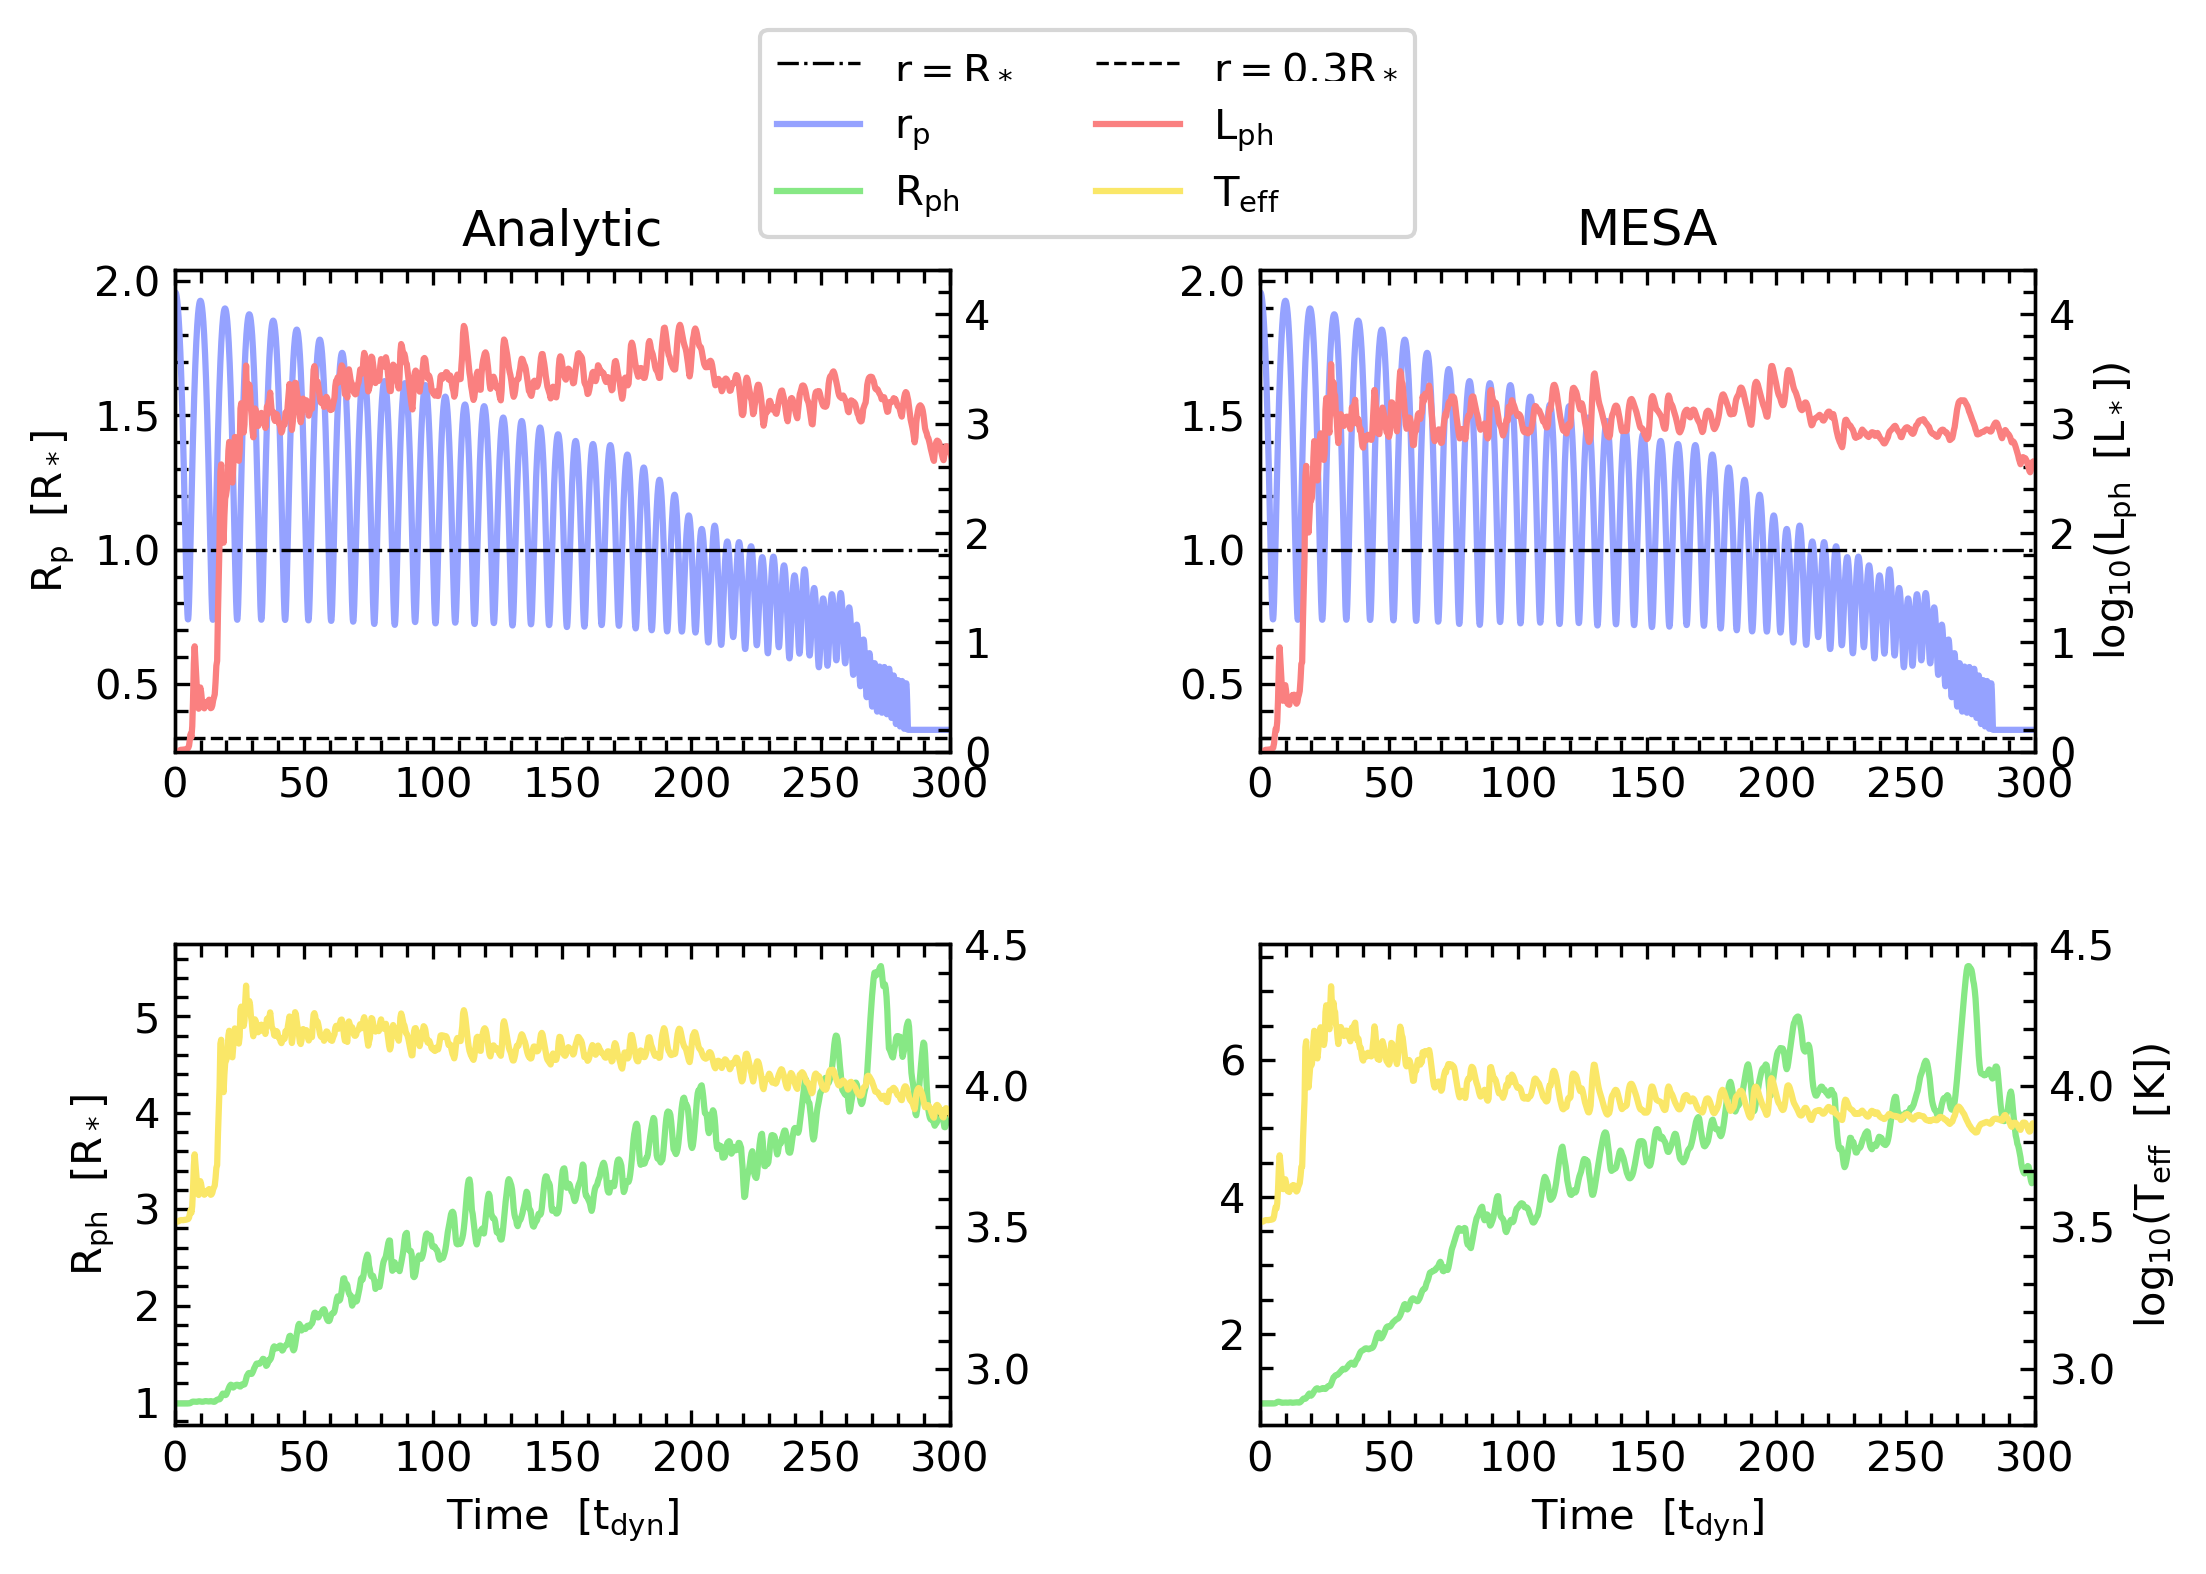

In [5]:
fig = plt.figure(figsize=(8,5), dpi=300)
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.4)
(ax1, ax3), (ax2, ax4) = gs.subplots()

# load light curve data for analytical and mesa opacity models
giant = '../../data/planetary_engulfment_test42/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
data_lc_ana =np.loadtxt('PEGMfig/test42_lc_ana.dat')
data_lc_mesa=np.loadtxt('PEGMfig/test42_lc_mesa.dat')
time_lc_ana =data_lc_ana[:,0]; int_lum_ana =data_lc_ana[:,1]; radii_aver_ana=data_lc_ana[:,2]
temp_aver_ana=data_lc_ana[:,3];rho_aver_ana=data_lc_ana[:,4]
time_lc_mesa=data_lc_mesa[:,0]; int_lum_mesa=data_lc_mesa[:,1]; radii_aver_mesa=data_lc_mesa[:,2]
temp_aver_mesa=data_lc_mesa[:,3];rho_aver_ana=data_lc_mesa[:,4]

#########################################################################################################
# Figure 1, analytical model luminosity and orbital distance of the planet (analytical opacity model).
#########################################################################################################
ax1_r = ax1.twinx()
ax1.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff')
ax1_r.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.log10(np.array(int_lum_ana)/int_lum_ana[20]),'#fa8080', label=r'$LC$')

ax1.set_title('Analytic')
ax1.set_ylabel(r'$R_p \ \ [R_*]$', fontsize=10)
ax1.set_xlim(0,300)
ax1_r.set_ylim(0,4.4)

# Add lengends
ax1.axhline(y=1, color='#000000', linestyle='-.', lw=0.8,label=r'$r=R_*$')
ax1.axvline(x=1e4, color='#95a2ff',label=r'$r_p$')
ax1.axvline(x=1e4, color='#87e885',label=r'$R_{ph}$')
ax1.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8,label=r'$r=0.3R_*$')
ax1.axvline(x=1e4, color='#fa8080',label=r'$L_{ph}$')
ax1.axvline(x=1e4, color='#fae768',label=r'$T_{eff}$')
ax1.legend(
    ncol=2,
    loc='upper right',          # Anchor point on legend
    bbox_to_anchor=(1.6, 1.5),  # Coordinates (x,y) relative to axes
    borderaxespad=0.           # Padding between axes and legend
)

###############################################################################
# Figure 2, photospheric radius and temperature (analytical opacity model).
###############################################################################
ax2_r = ax2.twinx()
ax2.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.array(radii_aver_ana)/r_giant,'#87e885',label=r'$r_{pho}$')
ax2_r.plot(np.array(time_lc_ana)/t_dyn_giant-6,np.log10(np.array(temp_aver_ana)),'#fae768',label=r'$T_{pho}$')

ax2.set_ylabel(r'$R_{ph}\ \ [R_*]$',fontsize=10)

ax2.set_xlabel(r'$Time \ \ [t_{dyn}]$',fontsize=10)
ax2.set_xlim(0,300)
ax2_r.set_ylim(2.8,4.5)


#########################################################################################################
# Figure 3, analytical model luminosity and orbital distance of the planet (mesa opacity model).
#########################################################################################################
ax3_r = ax3.twinx()
ax3.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff',label=r'$r_p$')
ax3_r.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.log10(np.array(int_lum_mesa)/int_lum_mesa[20]),'#fa8080', label=r'$LC$')

ax3.axhline(y=1, color='#000000', linestyle='-.', lw=0.8)
ax3.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax3.set_title('MESA')
ax3_r.set_ylabel(r'$log_{10}(L_{ph} \ \/ [L_*])$', fontsize=10)
ax3.set_xlim(0,300)
ax3_r.set_ylim(0,4.4)

###############################################################################
# Figure 4, photospheric radius and temperature (mesa opacity model).
###############################################################################

ax4_r = ax4.twinx()
ax4.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.array(radii_aver_mesa)/r_giant,'#87e885',label=r'$r_{pho}$')
ax4_r.plot(np.array(time_lc_mesa)/t_dyn_giant-6,np.log10(np.array(temp_aver_mesa)),'#fae768',label=r'$T_{pho}$')

ax4_r.set_ylabel(r'$log_{10}(T_{eff}\ \ [K])$',fontsize=10)
ax4.set_xlabel(r'$Time \ \ [t_{dyn}]$',fontsize=10)
ax4.set_xlim(0,300)
ax4_r.set_ylim(2.8,4.5)

plt.savefig('PEGMfig/orbit_RTD_lowe.pdf', format='pdf', bbox_inches='tight')

In [5]:
def get_plasma_colormap_strings(num_colors=256):
    """
    Returns the plasma colormap as an array of hex color strings
    
    Args:
        num_colors: Number of colors to extract from the colormap
        
    Returns:
        List of hex color strings (e.g., '#ff0033')
    """
    plasma = plt.get_cmap('jet')
    colors = plasma(np.linspace(0, 1, num_colors))
    return [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' 
            for r, g, b, _ in colors]

# Generate array
plasma_hex_array = get_plasma_colormap_strings()

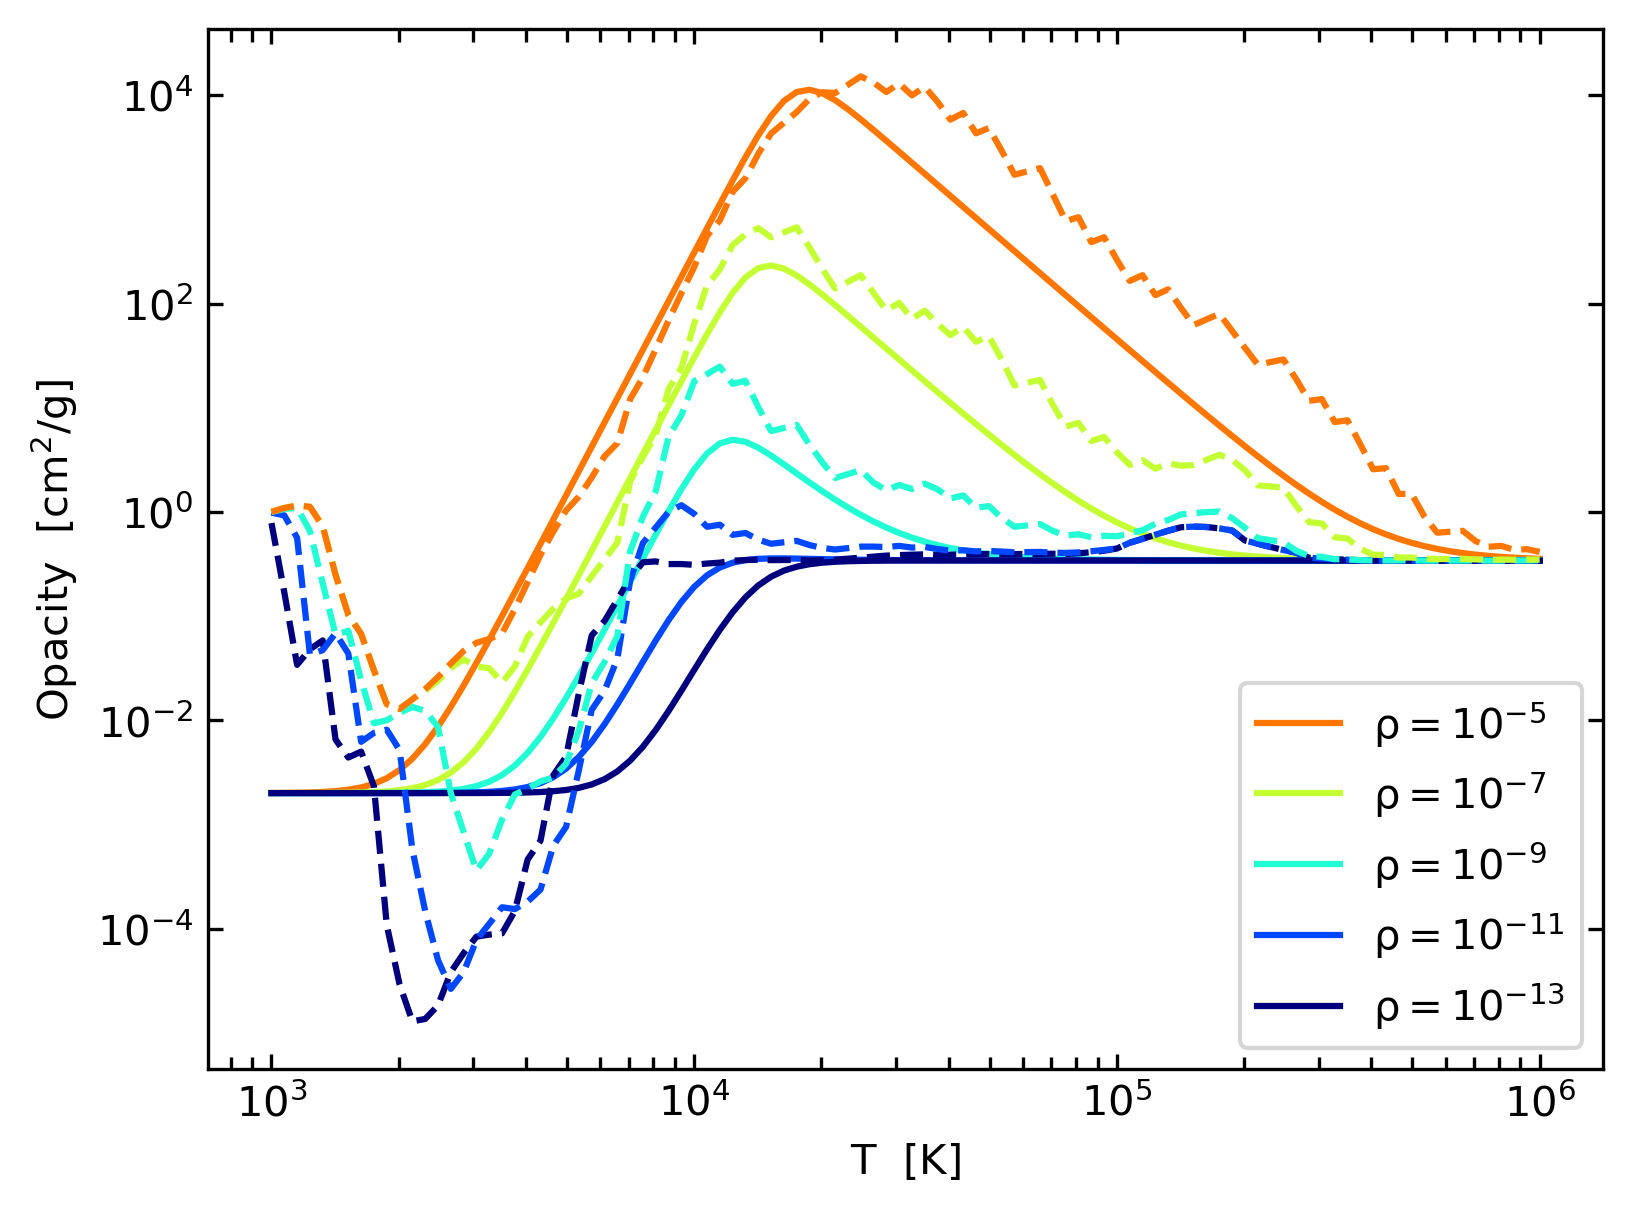

In [21]:
import light_curve_modified as lc
fig = plt.figure(figsize=(6,4.5), dpi=300)
ax = fig.add_subplot(111)

temp=np.logspace(3,6,100)
opacity13=lc.opac(1e-13*np.ones_like(temp),temp,0.7,0.02)/1e-13*np.ones_like(temp)
opacity11=lc.opac(1e-11*np.ones_like(temp),temp,0.7,0.02)/1e-11*np.ones_like(temp)
opacity9=lc.opac(1e-9*np.ones_like(temp),temp,0.7,0.02)/1e-9*np.ones_like(temp)
opacity7=lc.opac(1e-7*np.ones_like(temp),temp,0.7,0.02)/1e-7*np.ones_like(temp)
opacity5=lc.opac(1e-5*np.ones_like(temp),temp,0.7,0.02)/1e-5*np.ones_like(temp)

ax.plot(temp,opacity5,color=plasma_hex_array[200],label=r'$\rho=10^{-5}$')
ax.plot(temp,opacity7,color=plasma_hex_array[150],label=r'$\rho=10^{-7}$')
ax.plot(temp,opacity9,color=plasma_hex_array[100],label=r'$\rho=10^{-9}$')
ax.plot(temp,opacity11,color=plasma_hex_array[50],label=r'$\rho=10^{-11}$')
ax.plot(temp,opacity13,color=plasma_hex_array[0], label=r'$\rho=10^{-13}$')

script_dir = os.getcwd()
exe_path = os.path.join(script_dir, "opacMesa.exe")

opacity_mesa = lc.run_exe_batch(exe_path, np.log10(temp),lc.getLogR(np.log10(temp),np.log10(1e-13*np.ones_like(temp))))
ax.plot(temp,10**np.array(opacity_mesa),'--',color=plasma_hex_array[0])
opacity_mesa = lc.run_exe_batch(exe_path, np.log10(temp),lc.getLogR(np.log10(temp),np.log10(1e-11*np.ones_like(temp))))
ax.plot(temp,10**np.array(opacity_mesa),'--',color=plasma_hex_array[50])
opacity_mesa = lc.run_exe_batch(exe_path, np.log10(temp),lc.getLogR(np.log10(temp),np.log10(1e-9*np.ones_like(temp))))
ax.plot(temp,10**np.array(opacity_mesa),'--',color=plasma_hex_array[100])
opacity_mesa = lc.run_exe_batch(exe_path, np.log10(temp),lc.getLogR(np.log10(temp),np.log10(1e-7*np.ones_like(temp))))
ax.plot(temp,10**np.array(opacity_mesa),'--',color=plasma_hex_array[150])
opacity_mesa = lc.run_exe_batch(exe_path, np.log10(temp),lc.getLogR(np.log10(temp),np.log10(1e-5*np.ones_like(temp))))
ax.plot(temp,10**np.array(opacity_mesa),'--',color=plasma_hex_array[200])

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$Opacity\ \ [cm^2/g]$')
ax.set_xlabel(r'$T\ \ [K]$')
plt.legend(loc='lower right')
plt.savefig('PEGMfig/opacity.pdf', format='pdf', bbox_inches='tight')

(0.3, 10)

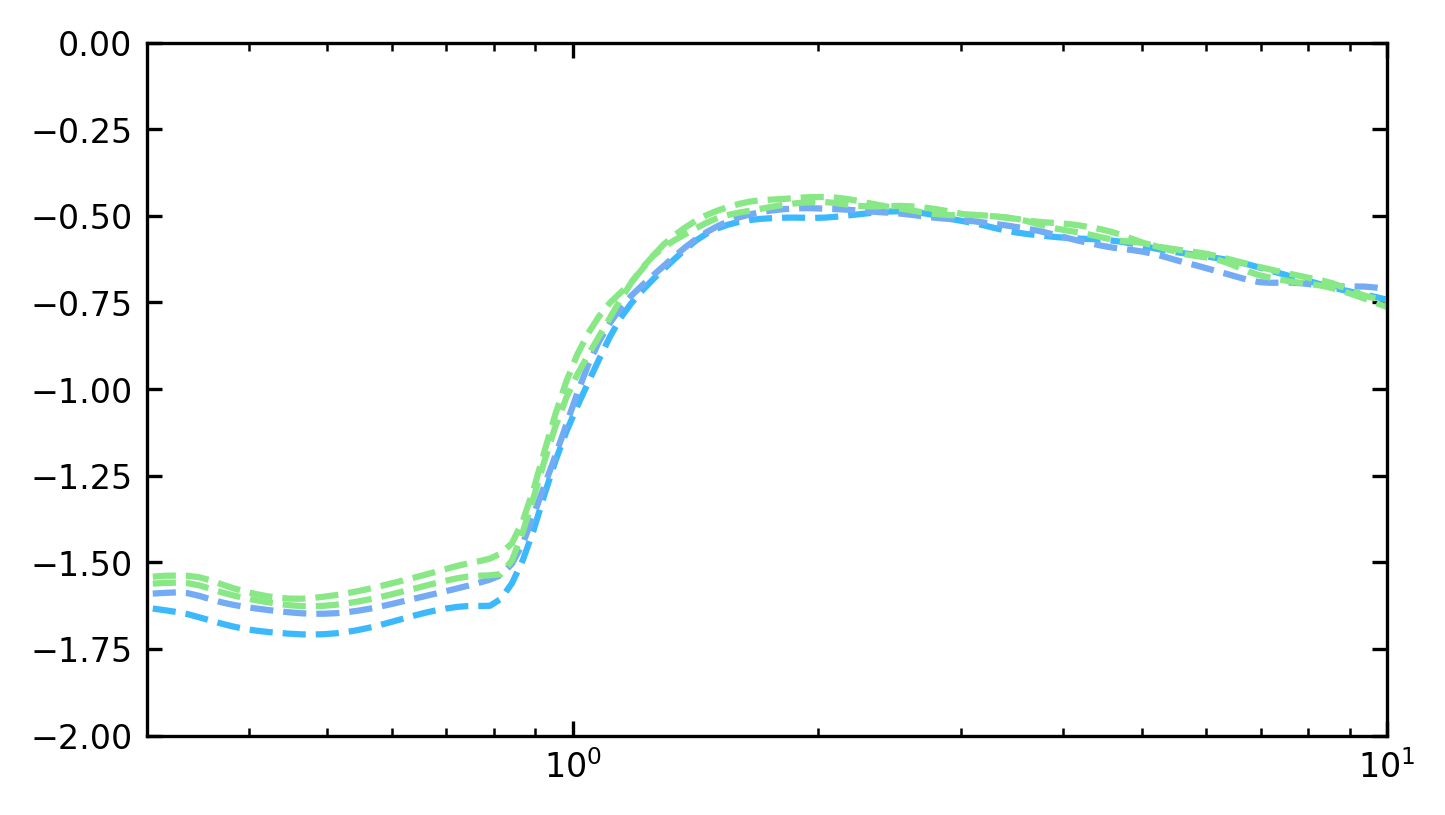

In [20]:
giant = '../../data/planetary_engulfment_test39/'

fig = plt.figure(figsize=(16/3,3), dpi=300)
ax = fig.add_subplot(111)

data = athdf(giant+'/PEGM.out1.00720.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(cs_star),color='#3cb9fc')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel3']**2)**0.5*data['r0'])/r_giant/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(v_star*data['x1v']**0.5),color='#3cb9fc',linestyle='--')

data = athdf(giant+'/PEGM.out1.00820.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(cs_star),color='#73abf5')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel3']**2)**0.5*data['r0'])/r_giant/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(v_star*data['x1v']**0.5),color='#73abf5',linestyle='--')

data = athdf(giant+'/PEGM.out1.00920.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(cs_star),color='#87e885')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel3']**2)**0.5/r_giant*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(v_star*data['x1v']**0.5),color='#87e885',linestyle='--')
ax.set_xscale('log')
data = athdf(giant+'/PEGM.out1.01000.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(cs_star),color='#87e885')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel3']**2)**0.5*data['r0'])/r_giant/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax.plot(data['x1v']/r_giant,np.log10(v_star*data['x1v']**0.5),color='#87e885',linestyle='--')
ax.set_xscale('log')
ax.set_ylim(-2,0)
ax.set_xlim(0.3,10)

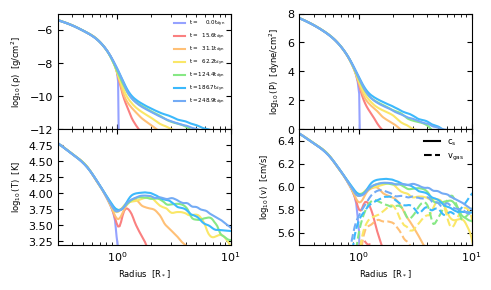

In [44]:
giant = '../../data/planetary_engulfment_test39/'
fig = plt.figure(figsize=(16/3,3))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.4)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col')

data = athdf(giant+'/PEGM.out1.00020.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#95a2ff',label=r'$t=\ \ \ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00070.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fa8080',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00120.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#ffc076',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00220.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fae768',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00420.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#87e885',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00620.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#3cb9fc',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00820.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#73abf5',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
ax1.set_xscale('log')
ax1.set_ylim(-12,-5)
ax1.set_xlim(0.3,10)
ax1.legend(frameon=False,loc='upper right', fontsize=4)
ax1.set_ylabel(r'$\log_{10}\left( \rho \right) \ \ [g/cm^2]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#73abf5')
ax2.set_xscale('log')
ax2.set_ylim(0,8)
ax2.set_xlim(0.3,10)
ax2.set_ylabel(r'$\log_{10}\left( P \right) \ \ [dyne/cm^2]$', fontsize=6)


data = athdf(giant+'/PEGM.out1.00020.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#73abf5')

ax3.set_xscale('log')
ax3.set_ylim(3.2,5)
ax3.set_xlim(0.3,10)
ax3.set_yticks([3.25,3.5,3.75,4,4.25,4.5,4.75])
ax3.set_ylabel(r'$\log_{10}\left( T \right) \ \ [K]$', fontsize=6)
ax3.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#95a2ff')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#95a2ff',linestyle='--')
data = athdf(giant+'/PEGM.out1.00070.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fa8080')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fa8080',linestyle='--')
data = athdf(giant+'/PEGM.out1.00120.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#ffc076')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#ffc076',linestyle='--')
data = athdf(giant+'/PEGM.out1.00220.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fae768')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fae768',linestyle='--')
data = athdf(giant+'/PEGM.out1.00420.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#87e885')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#87e885',linestyle='--')
data = athdf(giant+'/PEGM.out1.00620.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#3cb9fc')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#3cb9fc',linestyle='--')
data = athdf(giant+'/PEGM.out1.00820.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#73abf5')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#73abf5',linestyle='--')
ax4.set_xscale('log')
ax4.set_ylim(5.5,6.5)
ax4.set_xlim(0.3,10)
ax4.axvline(x=1e4, color='k',label=r'$c_s$')
ax4.axvline(x=1e4, color='k',label='$v_{gas}$',linestyle='--')
ax4.legend(frameon=False,loc='upper right', fontsize=6)

ax4.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)
ax4.set_ylabel(r'$\log_{10}\left( v \right) \ \ [cm/s]$', fontsize=6)
plt.savefig('PEGMfig/parameters.pdf', format='pdf', bbox_inches='tight')

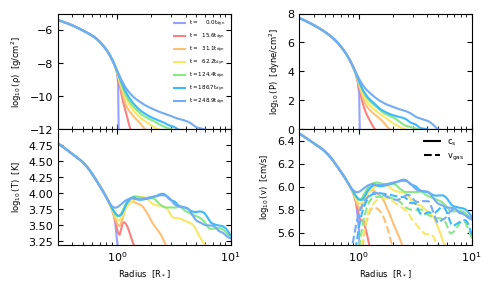

In [46]:
giant = '../../data/planetary_engulfment_test42/'
fig = plt.figure(figsize=(16/3,3))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.4)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col')

data = athdf(giant+'/PEGM.out1.00020.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#95a2ff',label=r'$t=\ \ \ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00070.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fa8080',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00120.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#ffc076',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00220.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fae768',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00420.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#87e885',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00620.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#3cb9fc',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00820.athdf')
rho_star=np.dot(np.sin(data['x2v']),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#73abf5',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
ax1.set_xscale('log')
ax1.set_ylim(-12,-5)
ax1.set_xlim(0.3,10)
ax1.legend(frameon=False,loc='upper right', fontsize=4)
ax1.set_ylabel(r'$\log_{10}\left( \rho \right) \ \ [g/cm^2]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#73abf5')
ax2.set_xscale('log')
ax2.set_ylim(0,8)
ax2.set_xlim(0.3,10)
ax2.set_ylabel(r'$\log_{10}\left( P \right) \ \ [dyne/cm^2]$', fontsize=6)


data = athdf(giant+'/PEGM.out1.00020.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#73abf5')

ax3.set_xscale('log')
ax3.set_ylim(3.2,5)
ax3.set_xlim(0.3,10)
ax3.set_yticks([3.25,3.5,3.75,4,4.25,4.5,4.75])
ax3.set_ylabel(r'$\log_{10}\left( T \right) \ \ [K]$', fontsize=6)
ax3.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#95a2ff')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#95a2ff',linestyle='--')
data = athdf(giant+'/PEGM.out1.00070.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fa8080')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fa8080',linestyle='--')
data = athdf(giant+'/PEGM.out1.00120.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#ffc076')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#ffc076',linestyle='--')
data = athdf(giant+'/PEGM.out1.00220.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fae768')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fae768',linestyle='--')
data = athdf(giant+'/PEGM.out1.00420.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#87e885')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#87e885',linestyle='--')
data = athdf(giant+'/PEGM.out1.00620.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#3cb9fc')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#3cb9fc',linestyle='--')
data = athdf(giant+'/PEGM.out1.00820.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#73abf5')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#73abf5',linestyle='--')
ax4.set_xscale('log')
ax4.set_ylim(5.5,6.5)
ax4.set_xlim(0.3,10)
ax4.axvline(x=1e4, color='k',label=r'$c_s$')
ax4.axvline(x=1e4, color='k',label='$v_{gas}$',linestyle='--')
ax4.legend(frameon=False,loc='upper right', fontsize=6)

ax4.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)
ax4.set_ylabel(r'$\log_{10}\left( v \right) \ \ [cm/s]$', fontsize=6)
plt.savefig('PEGMfig/parameters_le.pdf', format='pdf', bbox_inches='tight')

Text(0, 0.5, '$\\log_{10}\\left( v \\right) \\ \\ [cm/s]$')

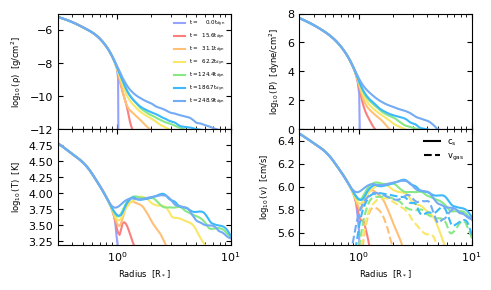

In [50]:
giant = '../../data/planetary_engulfment_test42/'
fig = plt.figure(figsize=(16/3,3))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.4)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col')

data = athdf(giant+'/PEGM.out1.00020.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#95a2ff',label=r'$t=\ \ \ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00070.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4

ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fa8080',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00120.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4

ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#ffc076',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00220.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#fae768',label=r'$t=\ \ %.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00420.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#87e885',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00620.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#3cb9fc',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
data = athdf(giant+'/PEGM.out1.00820.athdf')
rho_star=np.dot(np.sin(data['x2v'][47:51]),np.sum((data['rho']*data['r0'])/data['rho'].shape[0],axis=0)[47:51,:])/4
ax1.plot(data['x1v']/r_giant,np.log10(rho_star),color='#73abf5',label=r'$t=%.1f t_{dyn}$'%(data['Time']/t_dyn_giant-6.2))
ax1.set_xscale('log')
ax1.set_ylim(-12,-5)
ax1.set_xlim(0.3,10)
ax1.legend(frameon=False,loc='upper right', fontsize=4)
ax1.set_ylabel(r'$\log_{10}\left( \rho \right) \ \ [g/cm^2]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
press_star=np.dot(np.sin(data['x2v']),np.sum((data['press']*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax2.plot(data['x1v']/r_giant,np.log10(press_star),color='#73abf5')
ax2.set_xscale('log')
ax2.set_ylim(0,8)
ax2.set_xlim(0.3,10)
ax2.set_ylabel(r'$\log_{10}\left( P \right) \ \ [dyne/cm^2]$', fontsize=6)


data = athdf(giant+'/PEGM.out1.00020.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#95a2ff')
data = athdf(giant+'/PEGM.out1.00070.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fa8080')
data = athdf(giant+'/PEGM.out1.00120.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#ffc076')
data = athdf(giant+'/PEGM.out1.00220.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#fae768')
data = athdf(giant+'/PEGM.out1.00420.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#87e885')
data = athdf(giant+'/PEGM.out1.00620.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#3cb9fc')
data = athdf(giant+'/PEGM.out1.00820.athdf')
temp=data['press']/data['rho']*c.mp*1.25/2/c.kB*data['r0']
temp_aver=np.dot(np.sin(data['x2v']),np.sum((temp)/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax3.plot(data['x1v']/r_giant,np.log10(temp_aver),color='#73abf5')

ax3.set_xscale('log')
ax3.set_ylim(3.2,5)
ax3.set_xlim(0.3,10)
ax3.set_yticks([3.25,3.5,3.75,4,4.25,4.5,4.75])
ax3.set_ylabel(r'$\log_{10}\left( T \right) \ \ [K]$', fontsize=6)
ax3.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)

data = athdf(giant+'/PEGM.out1.00020.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#95a2ff')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#95a2ff',linestyle='--')
data = athdf(giant+'/PEGM.out1.00070.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fa8080')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fa8080',linestyle='--')
data = athdf(giant+'/PEGM.out1.00120.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#ffc076')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#ffc076',linestyle='--')
data = athdf(giant+'/PEGM.out1.00220.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#fae768')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#fae768',linestyle='--')
data = athdf(giant+'/PEGM.out1.00420.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#87e885')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#87e885',linestyle='--')
data = athdf(giant+'/PEGM.out1.00620.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#3cb9fc')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#3cb9fc',linestyle='--')
data = athdf(giant+'/PEGM.out1.00820.athdf')
cs_star=np.dot(np.sin(data['x2v']),np.sum(((gamma*data['press']/data['rho'])**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(cs_star),color='#73abf5')
v_star=np.dot(np.sin(data['x2v']),np.sum(((data['vel1']**2+data['vel2']**2+data['vel3']**2)**0.5*data['r0'])/data['rho'].shape[0],axis=0))/data['rho'].shape[1]
ax4.plot(data['x1v']/r_giant,np.log10(v_star),color='#73abf5',linestyle='--')
ax4.set_xscale('log')
ax4.set_ylim(5.5,6.5)
ax4.set_xlim(0.3,10)
ax4.axvline(x=1e4, color='k',label=r'$c_s$')
ax4.axvline(x=1e4, color='k',label='$v_{gas}$',linestyle='--')
ax4.legend(frameon=False,loc='upper right', fontsize=6)

ax4.set_xlabel(r'$Radius \ \ [R_*]$', fontsize=6)
ax4.set_ylabel(r'$\log_{10}\left( v \right) \ \ [cm/s]$', fontsize=6)
#plt.savefig('PEGMfig/parameters_le.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...


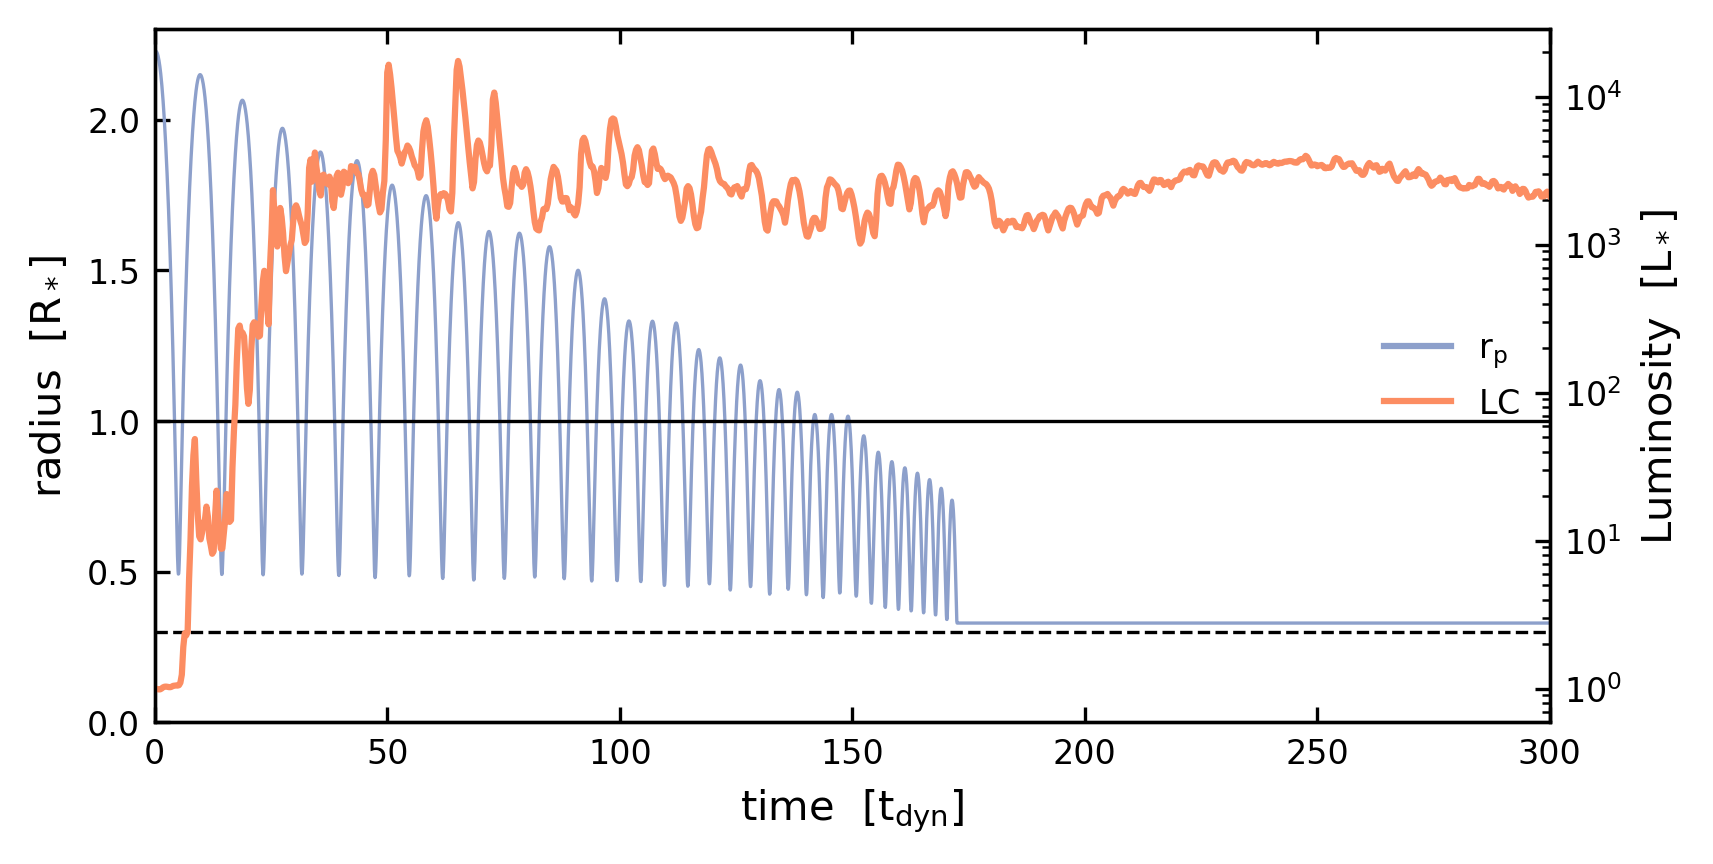

In [32]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#8da0cb', lw=0.8)
ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[20],'#fc8d62', label='LC')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)


ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
ax.axvline(x=1e4, color='#8da0cb',label='$r_p$')
ax.axvline(x=1e4, color='#fc8d62',label='$LC$')
ax.legend(frameon=False,loc='center right')

plt.savefig('PEGMfig/orbit.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...


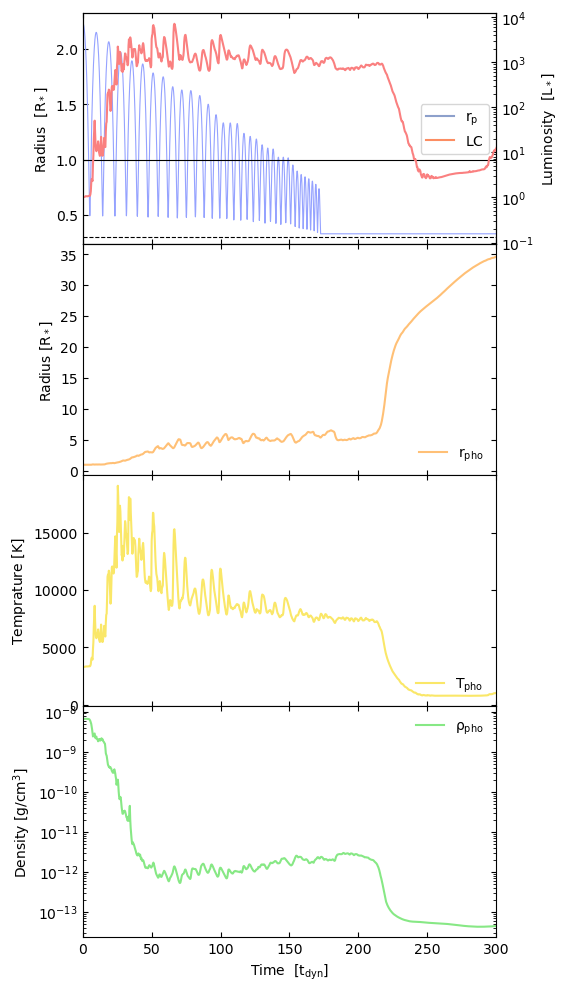

In [6]:
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

data_lc=np.loadtxt('PEGMfig/test39_lc.dat')
time_lc_39=data_lc[:,0]; int_lum_39=data_lc[:,1]; radii_aver_39=data_lc[:,2]; temp_aver_39=data_lc[:,3];rho_aver_39=data_lc[:,4]

fig = plt.figure(figsize=(16/3,12))
gs = fig.add_gridspec(4, 1, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4) = gs.subplots(sharex='col')

ax1_r = ax1.twinx()
ax1.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff', lw=0.8)
ax1_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[0],'#fa8080', label='LC')

ax1.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax1.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax1.set_ylabel('$Radius \ \ [R_*]$', fontsize=10)
ax1_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

#ax1.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
#ax1.set_xlim(0,300)
# ax1.set_ylim(0,2.3)

ax1_r.set_yscale('log')
ax1.axvline(x=1e4, color='#8da0cb',label=r'$r_p$')
ax1.axvline(x=1e4, color='#fc8d62',label=r'$LC$')
ax1.legend(loc='center right',fontsize=10, facecolor='white')


#figure2
ax2.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(radii_aver_39)/r_giant,'#ffc076',label=r'$r_{pho}$')

ax2.set_ylabel('$Radius\\ [R_*]$',fontsize=10)
# ax2.set_xlim(0,3e2)

ax2.legend(frameon=False,loc='lower right')

#figure3
ax3.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(temp_aver_39),'#fae768',label=r'$T_{pho}$')
ax3.set_ylabel('$Temprature\\ [K]$',fontsize=10)
# ax3.set_xlim(0,3e2)

ax3.legend(frameon=False,loc='lower right')

#figure4

ax4.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(rho_aver_39),'#87e885',label=r'$\rho_{pho}$')

ax4.set_ylabel('$Density\\ [g/cm^3]$',fontsize=10)
ax4.set_xlabel('$Time \ \ [t_{dyn}]$',fontsize=10)

ax4.set_yscale('log')
ax4.set_xlim(0,3e2)
# ax4.set_xlim(-6,10)
ax4.legend(frameon=False,loc='upper right')
#plt.savefig('PEGMfig/orbit_RTD.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...


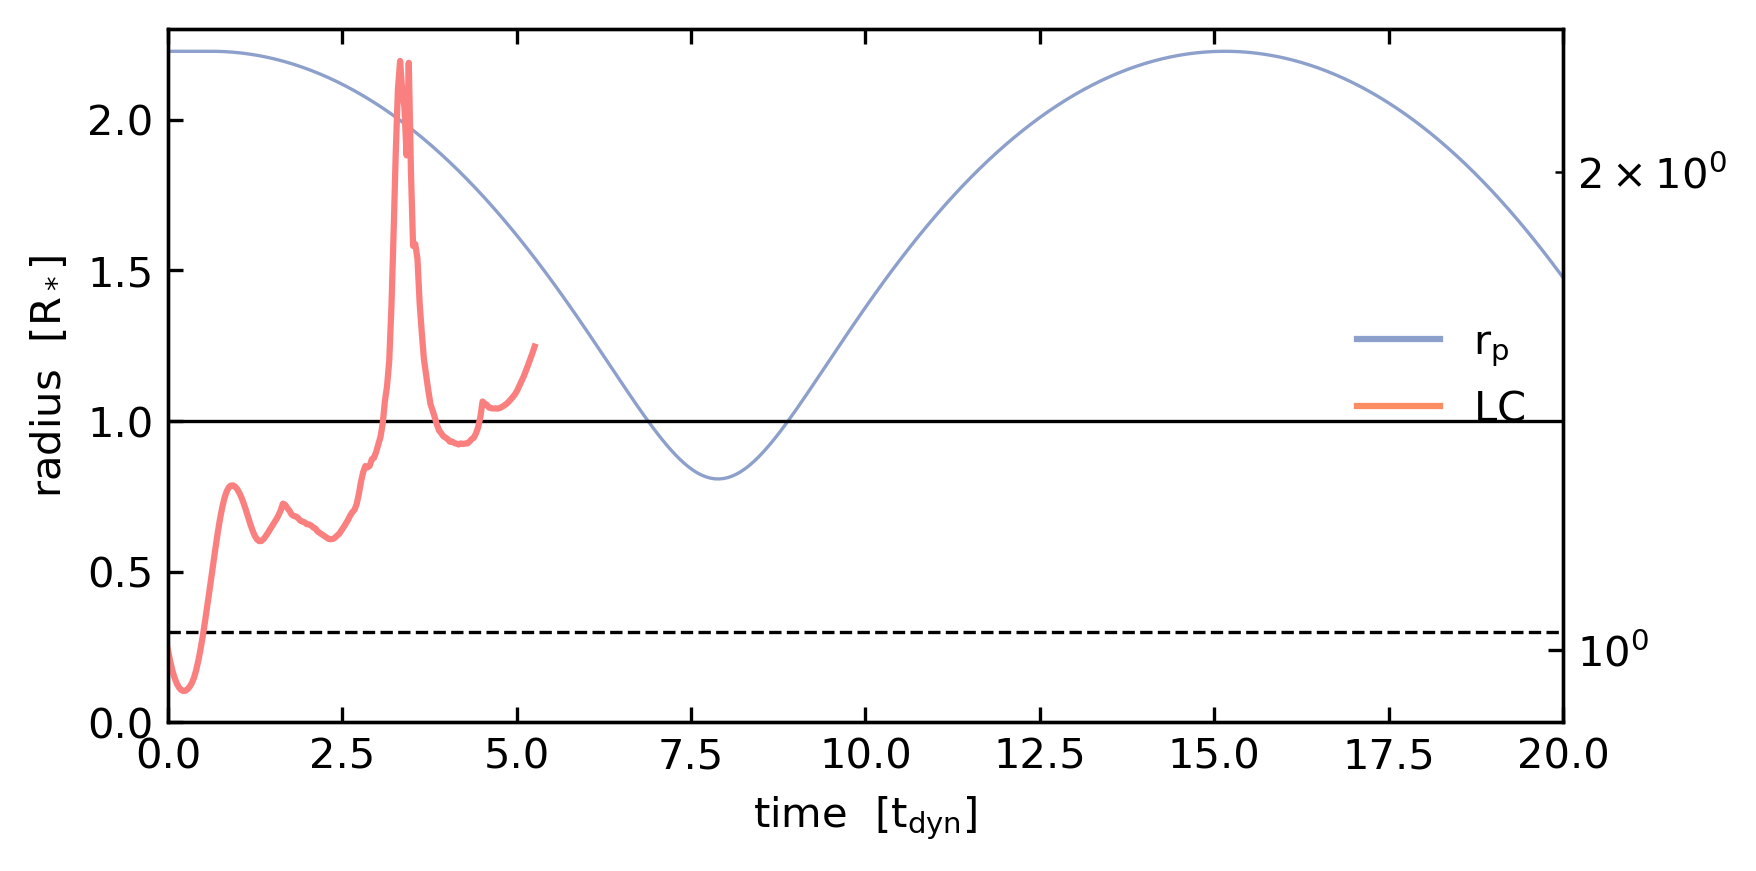

In [12]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test51/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant, orb_giant['sep'][:]/r_giant,'#8da0cb', lw=0.8)
ax_r.plot(np.array(time_lc_39)/t_dyn_giant,np.array(int_lum_39)/int_lum_39[0],'#fa8080', label='LC')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)
#ax.axvline(x=orb_giant['time'][a]/t_dyn_giant-6)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
#ax_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,20)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
ax.axvline(x=1e4, color='#8da0cb',label='$r_p$')
ax.axvline(x=1e4, color='#fc8d62',label='$LC$')
ax.legend(frameon=False,loc='center right')

#plt.savefig('PEGMfig/orbit.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...


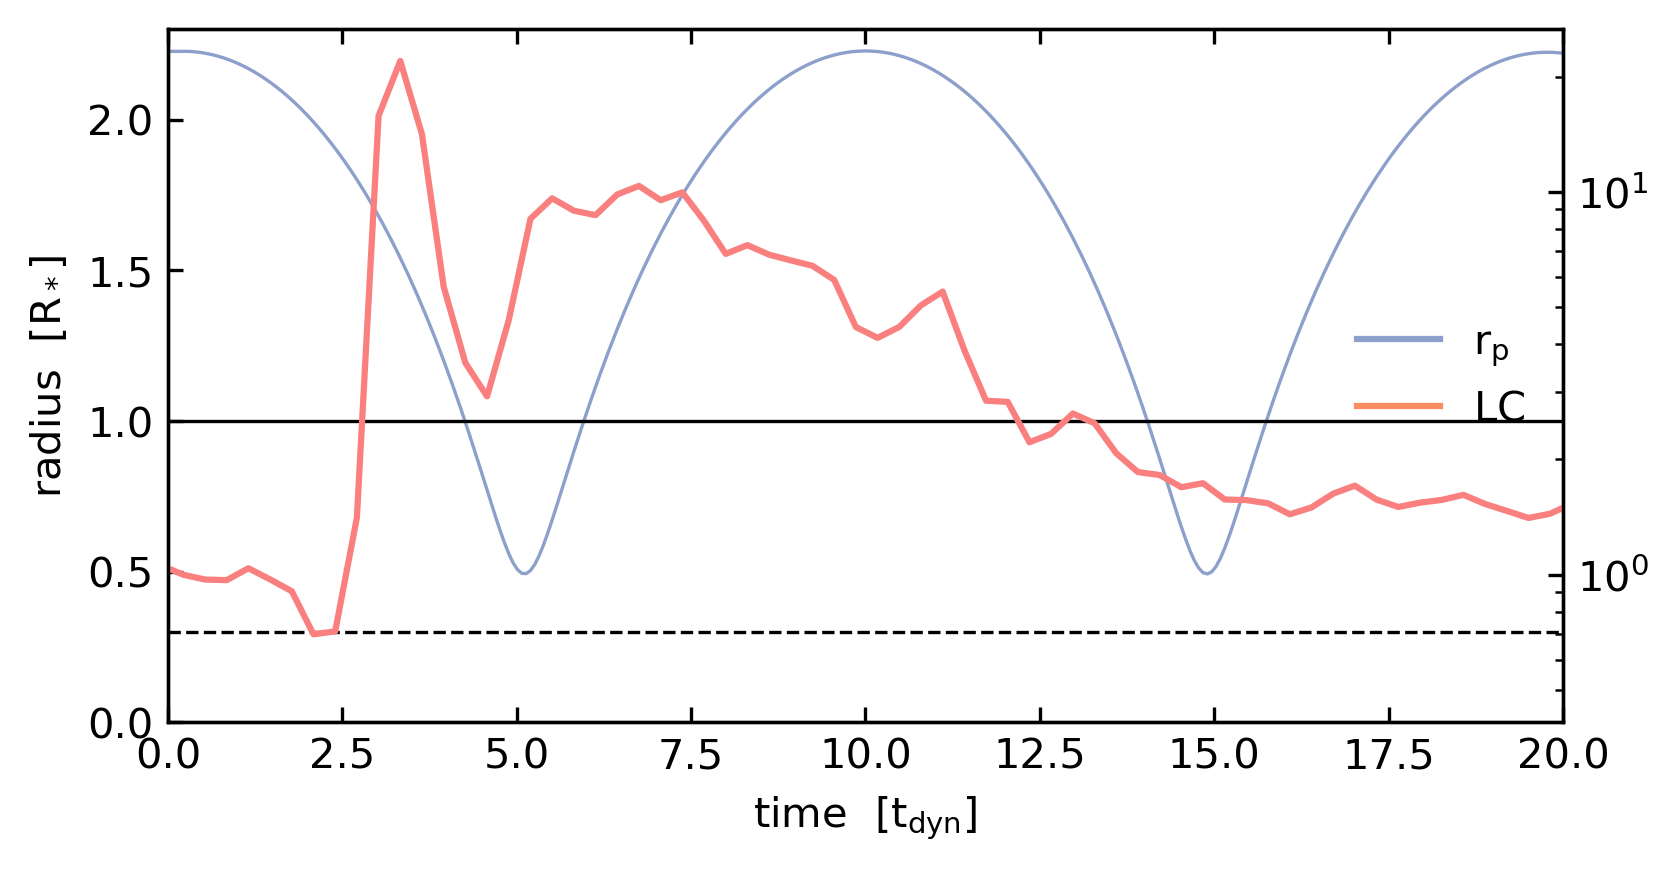

In [8]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test52/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#8da0cb', lw=0.8)
ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[20],'#fa8080', label='LC')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)
#ax.axvline(x=orb_giant['time'][a]/t_dyn_giant-6)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
#ax_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,20)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
ax.axvline(x=1e4, color='#8da0cb',label='$r_p$')
ax.axvline(x=1e4, color='#fc8d62',label='$LC$')
ax.legend(frameon=False,loc='center right')

#plt.savefig('PEGMfig/orbit.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...


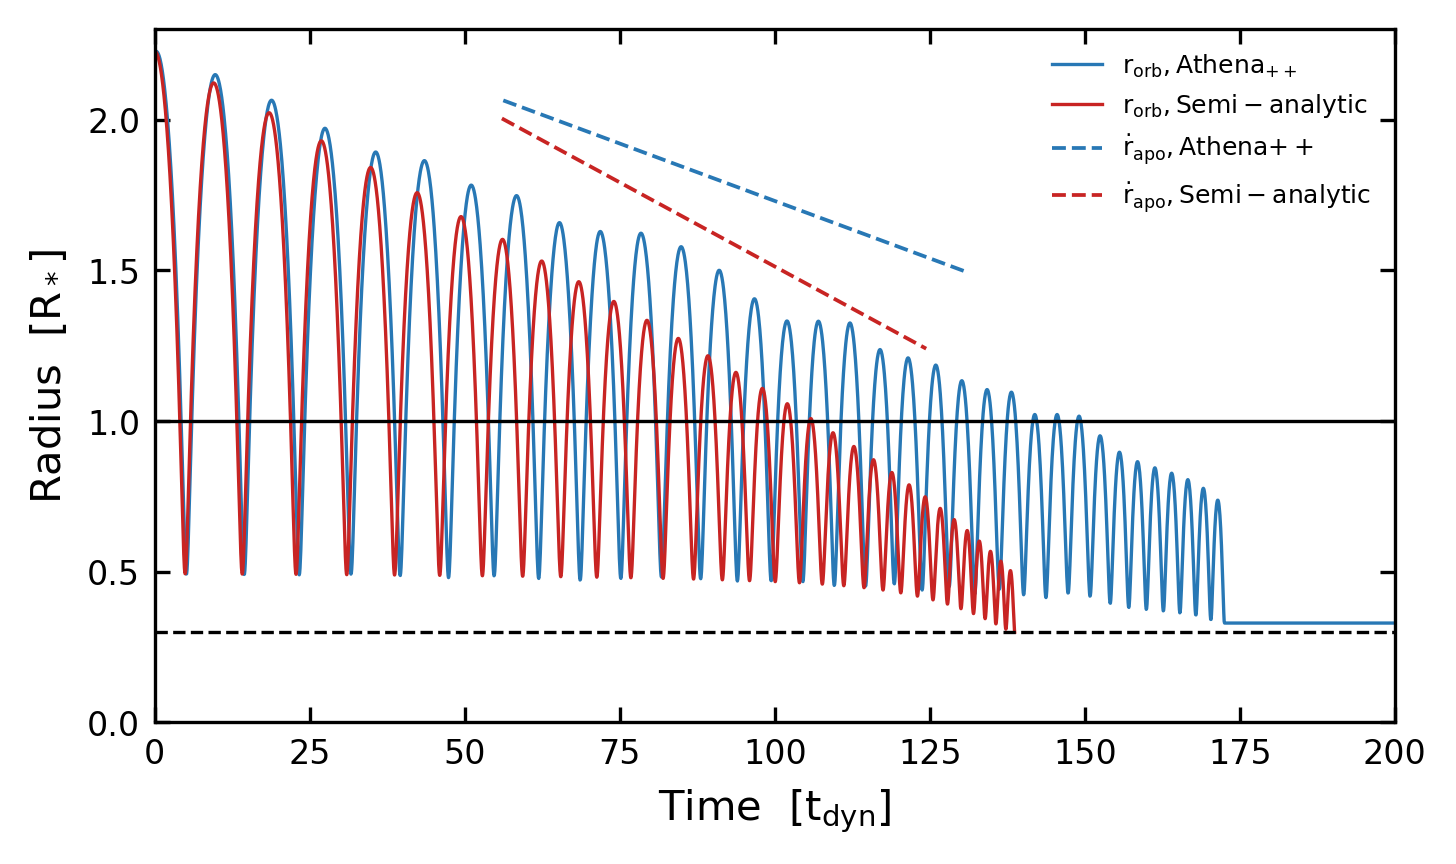

In [17]:
from scipy.signal import find_peaks

#plot the orbits
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

# find the peaks in orbits
peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
poly1d_fn = np.poly1d(coef)

semi = np.loadtxt('PEGMfig/rp05_e65_thiswork')
orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
time_semi = semi[:,4]
peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
poly1d_fn_semi = np.poly1d(coef_semi)

fig = plt.figure(figsize=(16/3,3), dpi=300)
ax = fig.add_subplot(111)
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#2878b5', lw=0.8,label='$r_{orb},Athena_{++}$')
ax.plot(time_semi, orb_semi/r_giant,'#c82423', lw=0.8,label='$r_{orb},Semi-analytic$')
#ax.plot((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], "xr")
ax.plot((orb_giant['time'][1000:2200]/t_dyn_giant-6),poly1d_fn((orb_giant['time'][1000:2200]/t_dyn_giant-6))+0.3*np.ones(1200),
        '#2878b5',linestyle='--', lw=0.9,label=r'$\dot{r}_{apo},Athena{++}"$ ')
ax.plot((time_semi[22500:50000]),poly1d_fn_semi((time_semi[22500:50000]))+0.4*np.ones(27500),
        '#c82423',linestyle='--', lw=0.9,label=r'$\dot{r}_{apo},Semi-analytic"$ ')

#ax.annotate(r'$\dot{r}_{apo}=%.2e"$ '%coef[0], xy=(100, 1.7), xytext=(75, 1.4),color='#2878b5',rotation=-26.425119520149387, fontsize=10)

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)
#ax.axvline(x=orb_giant['time'][a]/t_dyn_giant-6)

ax.set_ylabel('$Radius \ \ [R_*]$', fontsize=10)

ax.set_xlabel('$Time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,200)
ax.set_ylim(0,2.3)

#ax.axvline(x=1e4, color='#2878b5',label='$r_{orb}$')
#ax.axvline(x=1e4, color='#fc8d62',label='$LC$')
ax.legend(frameon=False,loc='upper right', fontsize=6)

#plt.savefig('PEGMfig/orbit_semi.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


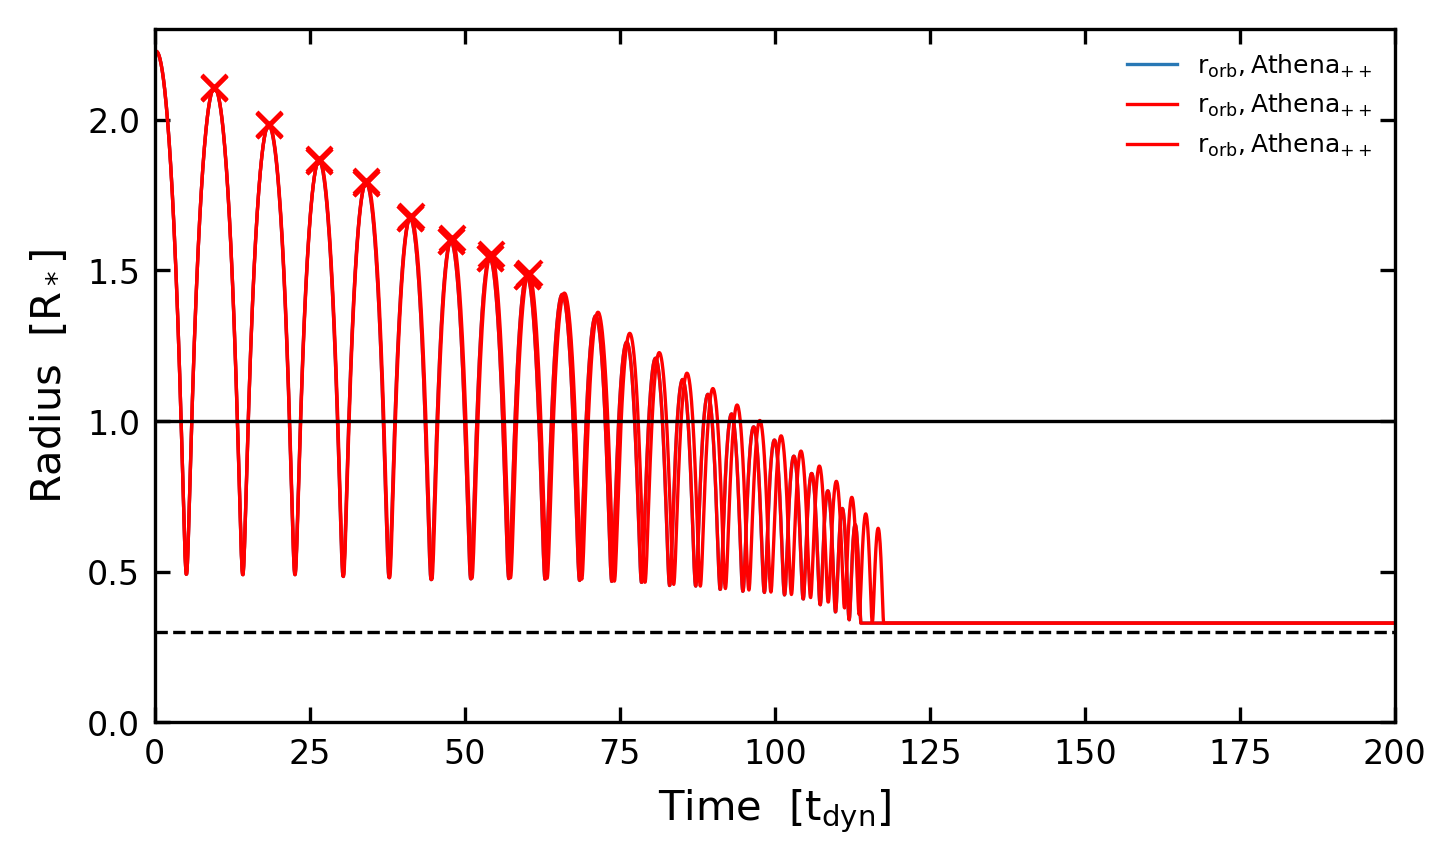

In [25]:
from scipy.signal import find_peaks

#plot the orbits
giant = '../../data/planetary_engulfment_test44/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

# find the peaks in orbits
peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
poly1d_fn = np.poly1d(coef)

semi = np.loadtxt('PEGMfig/rp05_e65_thiswork')
orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
time_semi = semi[:,4]
peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
poly1d_fn_semi = np.poly1d(coef_semi)

fig = plt.figure(figsize=(16/3,3), dpi=300)
ax = fig.add_subplot(111)
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#2878b5', lw=0.8,label='$r_{orb},Athena_{++}$')
#ax.plot(time_semi, orb_semi/r_giant,'#c82423', lw=0.8,label='$r_{orb},Semi-analytic$')
ax.plot((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], "xr")

giant = '../../data/planetary_engulfment_test41/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

# find the peaks in orbits
peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
poly1d_fn = np.poly1d(coef)

ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'r', lw=0.8,label='$r_{orb},Athena_{++}$')

ax.plot((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], "xr")
giant = '../../data/planetary_engulfment_test45/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")

# find the peaks in orbits
peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
poly1d_fn = np.poly1d(coef)

ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'r', lw=0.8,label='$r_{orb},Athena_{++}$')

ax.plot((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], "xr")
#ax.plot((orb_giant['time'][1000:2200]/t_dyn_giant-6),poly1d_fn((orb_giant['time'][1000:2200]/t_dyn_giant-6))+0.3*np.ones(1200),
 #       '#2878b5',linestyle='--', lw=0.9,label=r'$\dot{r}_{apo},Athena{++}"$ ')
#ax.plot((time_semi[22500:50000]),poly1d_fn_semi((time_semi[22500:50000]))+0.4*np.ones(27500),
#        '#c82423',linestyle='--', lw=0.9,label=r'$\dot{r}_{apo},Semi-analytic"$ ')

#ax.annotate(r'$\dot{r}_{apo}=%.2e"$ '%coef[0], xy=(100, 1.7), xytext=(75, 1.4),color='#2878b5',rotation=-26.425119520149387, fontsize=10)

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)
#ax.axvline(x=orb_giant['time'][a]/t_dyn_giant-6)

ax.set_ylabel('$Radius \ \ [R_*]$', fontsize=10)

ax.set_xlabel('$Time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,200)
ax.set_ylim(0,2.3)

#ax.axvline(x=1e4, color='#2878b5',label='$r_{orb}$')
#ax.axvline(x=1e4, color='#fc8d62',label='$LC$')
ax.legend(frameon=False,loc='upper right', fontsize=6)

#plt.savefig('PEGMfig/orbit_semi.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


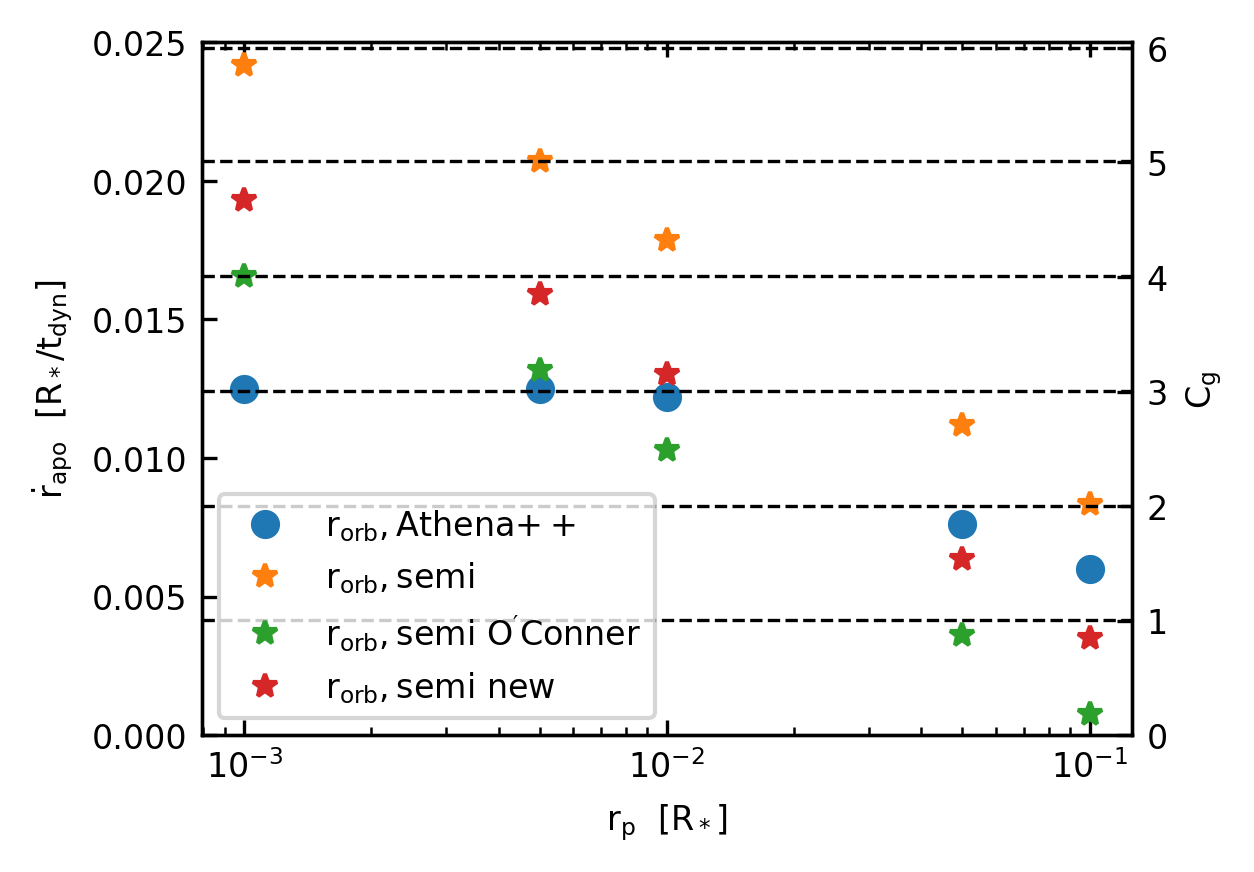

In [18]:
from scipy.signal import find_peaks

rp = np.array([0.001, 0.005, 0.01 , 0.05 , 0.1])
files = ['../../data/planetary_engulfment_test44/','../../data/planetary_engulfment_test41/','../../data/planetary_engulfment_test45/',
        '../../data/planetary_engulfment_test39/','../../data/planetary_engulfment_test43/']
dot_r_apo=[]
for file in files:
    orb_giant = ou.read_trackfile(file+"pm_trackfile.dat")

    # find the peaks in orbits
    peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
    coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
    dot_r_apo.append(abs(coef[0]))

dot_r_apo_semi=[]  
for r in rp:
    semi = np.loadtxt('PEGMfig/rp%03d_e65_thiswork' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi.append(abs(coef_semi[0]))

dot_r_apo_semi_corner=[]  
for r in rp:
    semi = np.loadtxt('PEGMfig/rp%03d_e65_Corner' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi_corner.append(abs(coef_semi[0]))
    
dot_r_apo_semi_new=[]  
for r in rp:
    semi = np.loadtxt('PEGMfig/rp%03d_e65_new' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi_new.append(abs(coef_semi[0]))
    
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.add_subplot(111)
ax_r=ax.twinx()
ax.plot(rp[:], dot_r_apo[:], 'o',label='$r_{orb},Athena{++}$')
ax.plot(rp[:], dot_r_apo_semi[:], '*',label='$r_{orb},semi$')
ax.plot(rp[:], dot_r_apo_semi_corner[:], '*',label='$r_{orb},semi\  O\'Conner$')
ax.plot(rp[:], dot_r_apo_semi_new[:], '*',label='$r_{orb},semi\  new$')

for i in range(1,7):
    semi = np.loadtxt('PEGMfig/e65_%2d' %(i*10))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    ax.axhline(y=abs(coef_semi[0]), color='#000000', linestyle='--', lw=0.8)
ax.legend(loc='lower left', fontsize=8, facecolor='white')
ax.set_xscale('log')
ax.set_ylim(0,0.025)
ax_r.set_ylim(0,6.05)
ax.set_xlabel(r'$r_p \ \ [R_*]$', fontsize=8)

ax.set_ylabel(r'$\dot{r}_{apo} \ \ [R_*/t_{dyn}]$', fontsize=8)
ax_r.set_ylabel(r'$C_g$', fontsize=8)
plt.savefig('PEGMfig/rdot_rp.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


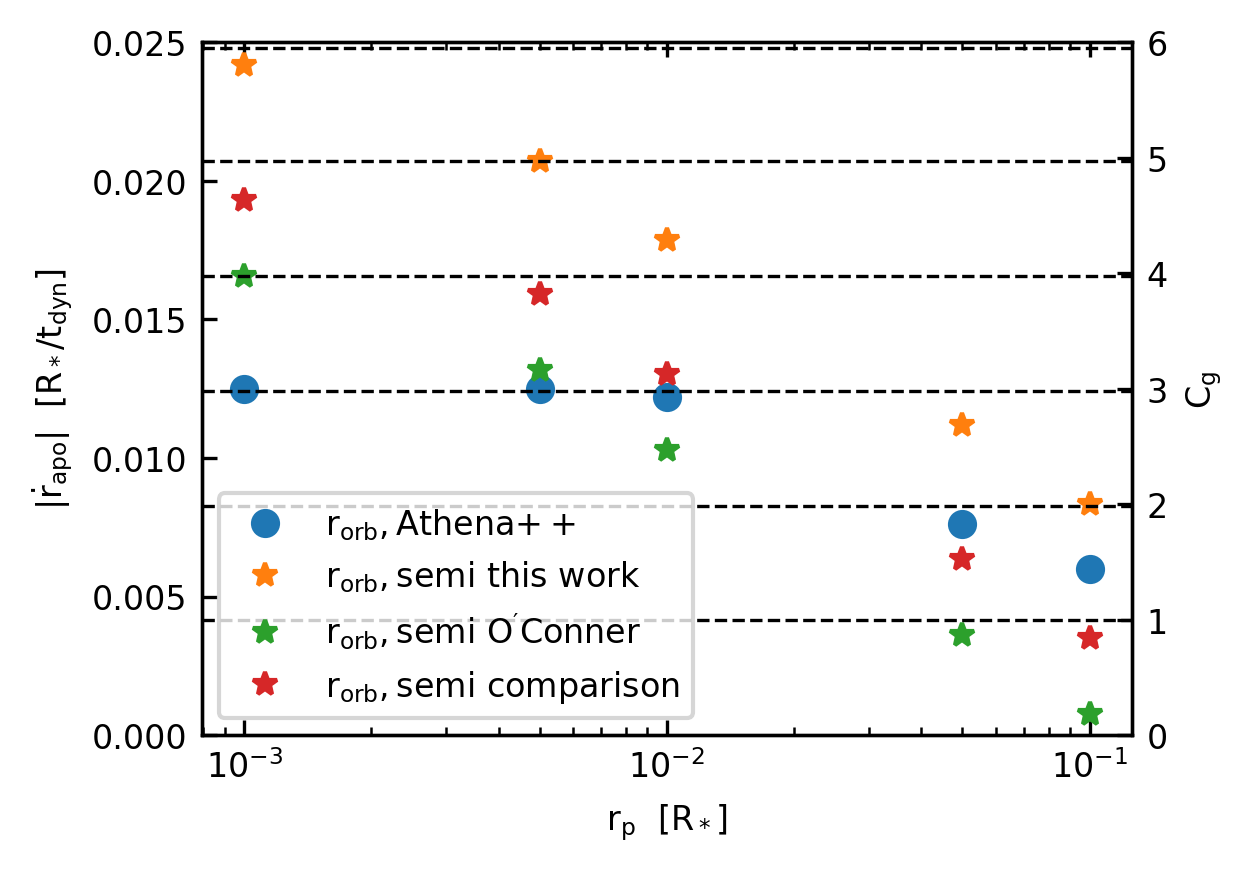

In [23]:
from scipy.signal import find_peaks

rp = np.array([0.001, 0.005, 0.01 , 0.05 , 0.1])
files = ['../../data/planetary_engulfment_test44/','../../data/planetary_engulfment_test41/','../../data/planetary_engulfment_test45/',
        '../../data/planetary_engulfment_test39/','../../data/planetary_engulfment_test43/']
dot_r_apo=[]
for file in files:
    orb_giant = ou.read_trackfile(file+"pm_trackfile.dat")

    # find the peaks in orbits
    peaks, _ = find_peaks(orb_giant['sep'][:]/r_giant, prominence=1) 
    coef = np.polyfit((orb_giant['time'][:]/t_dyn_giant-6)[peaks], (orb_giant['sep'][:]/r_giant)[peaks], 1)
    dot_r_apo.append(abs(coef[0]))

dot_r_apo_semi=[]  
for r in rp:
    semi = np.loadtxt('semiData/e65_rp%03d_thiswork' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi.append(abs(coef_semi[0]))

dot_r_apo_semi_corner=[]  
for r in rp:
    semi = np.loadtxt('semiData/e65_rp%03d_ocorner' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi_corner.append(abs(coef_semi[0]))
    
dot_r_apo_semi_new=[]  
for r in rp:
    semi = np.loadtxt('semiData/e65_rp%03d_new' %(r*1000))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    dot_r_apo_semi_new.append(abs(coef_semi[0]))
    
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.add_subplot(111)
ax_r=ax.twinx()
ax.plot(rp[:], dot_r_apo[:], 'o',label='$r_{orb},Athena{++}$')
ax.plot(rp[:], dot_r_apo_semi[:], '*',label='$r_{orb},semi\ this\  work$')
ax.plot(rp[:], dot_r_apo_semi_corner[:], '*',label='$r_{orb},semi\  O\'Conner$')
ax.plot(rp[:], dot_r_apo_semi_new[:], '*',label='$r_{orb},semi\  comparison$')

for i in range(1,7):
    semi = np.loadtxt('semiData/e65_%2d_const' %(i*10))
    orb_semi = (semi[:,0]**2+semi[:,1]**2)**0.5
    time_semi = semi[:,4]
    peaks_semi, _ = find_peaks(orb_semi/r_giant, prominence=1) 
    coef_semi = np.polyfit((time_semi)[peaks_semi], (orb_semi/r_giant)[peaks_semi], 1)
    ax.axhline(y=(abs(coef_semi[0])), color='#000000', linestyle='--', lw=0.8)
ax.legend(loc='lower left', fontsize=8, facecolor='white')
ax.set_xscale('log')
ax.set_ylim(0,0.025)
ax_r.set_ylim(0,6)
ax.set_xlabel(r'$r_p \ \ [R_*]$', fontsize=8)

ax.set_ylabel(r'$|\dot{r}_{apo}| \ \ [R_*/t_{dyn}]$', fontsize=8)
ax_r.set_ylabel(r'$C_g$', fontsize=8)
plt.savefig('PEGMfig/rdot_rp.pdf', format='pdf', bbox_inches='tight')


In [6]:
int_lum_39[20]/3.846/1e33

1063.983833899594

In [35]:
np.arctan(coef[0]*300/2.3/2)*180/np.pi

-26.425119520149387

reading orbit file for binary simulation...


(0.0, 300.0)

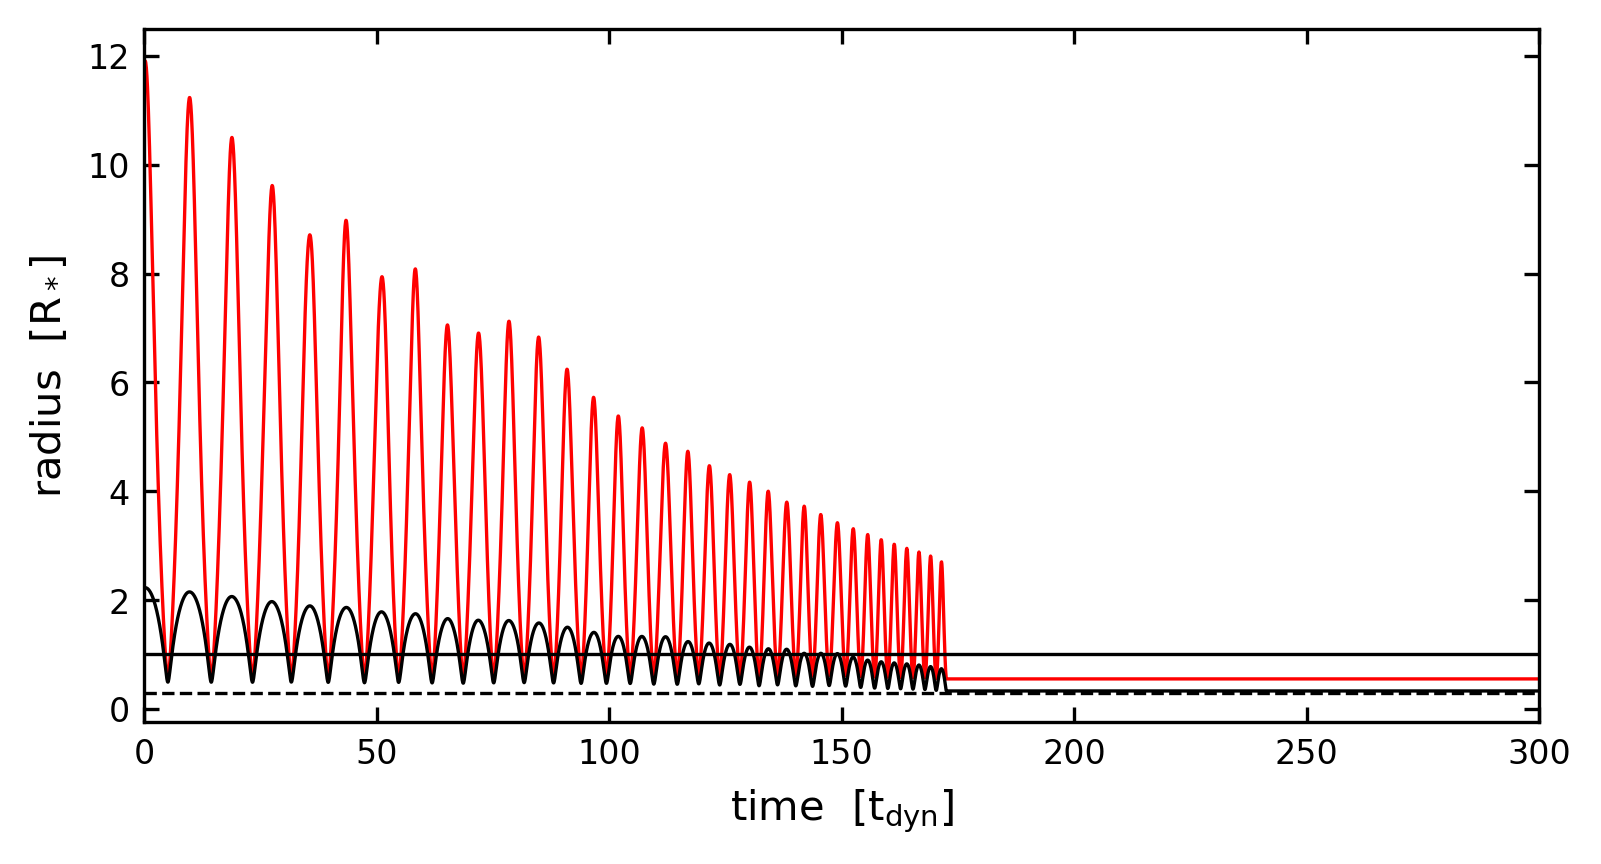

In [8]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
#ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, 2*c.G*c.Mj/orb_giant['vmag']**2/c.Rj,'r', lw=0.8, label='ra/rp')
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'k', lw=0.8, label='orbital decay')
#ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[20], label='LC')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)
#ax.axvline(x=orb_giant['time']/t_dyn_giant-6)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
#ax_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
#ax.set_ylim(0,2.3)

#ax.set_xscale('log')
#ax_r.set_yscale('log')

In [27]:
int_lum_39[20]/3.846/1e33
a=200
print(orb_giant['time'][a]/t_dyn_giant,\
(orb_giant['vmag'][a])**2*3/16*0.625*c.mp/c.kB)


12.442472058566894 20741.731647631306


In [31]:
orb_giant['vmag'][a]

3822311.070898992

In [10]:
3.846*1e33*1e6/3**2/1e20/0.34*t_dyn_giant/c.msun*300

3.0472696927040667e-06

In [23]:
T=10000
nH = 1e-11/1.25/c.mp*0.7
ne = 1e-11/1.25/c.mp*(0.7+0.3*2)
volumn= 4*np.pi*(100*c.rsun)**2*c.rsun
Cff = ne**2*1.42*1e-27*ne*nH*T**-0.5/(ne*2)/c.kB/T/3*2
Crec=2.6*1e-13 * T**(-0.7) * ne**2 * nH**2
print(ne)

6217782990883.952


In [16]:
c=Constants.Constants()

Constants defined...


In [11]:
4*np.pi*c.G*c.msun*c.c/0.34/(3.846*1e33)

38244.00404434883

reading orbit file for binary simulation...


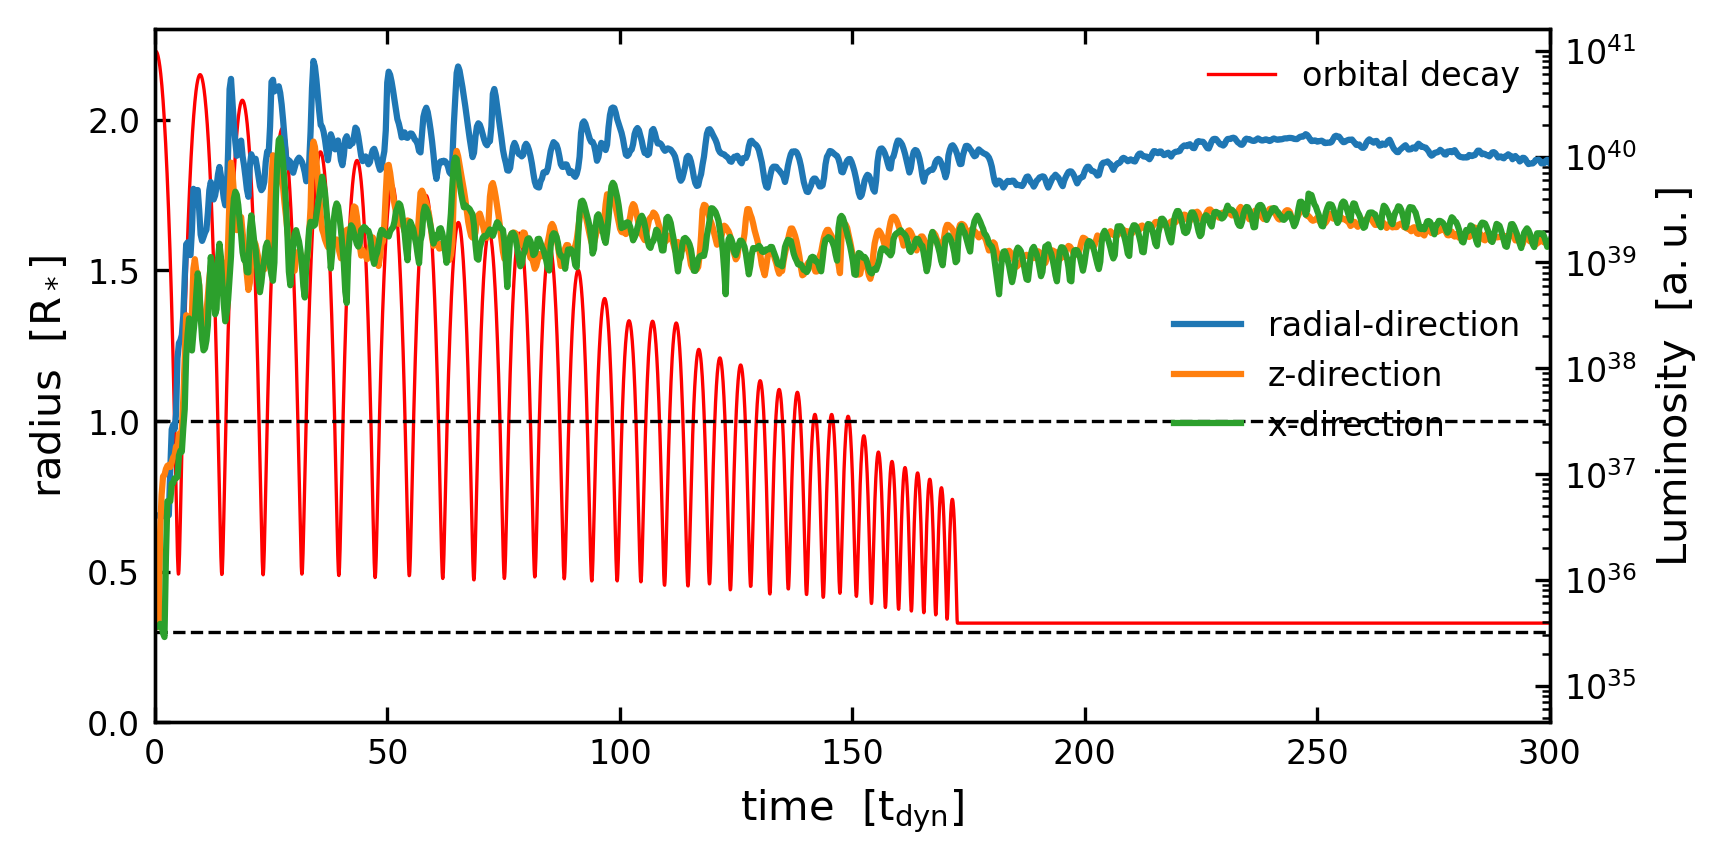

In [14]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test40/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'r', lw=0.8, label='orbital decay')
ax_r.plot(np.array(time_lc_26)/t_dyn_giant-6,np.array(int_lum_26), label='radial-direction')
ax_r.plot(np.array(time_lc_z)/t_dyn_giant-6,np.array(int_lum_z), label='z-direction')
ax_r.plot(np.array(time_lc_x)/t_dyn_giant-6,np.array(int_lum_x), label='x-direction')

ax.axhline(y=1, color='#000000', linestyle='--', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Luminosity \ \ [a.u.]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')

ax.legend(frameon=False)
ax_r.legend(frameon=False,loc='center right')

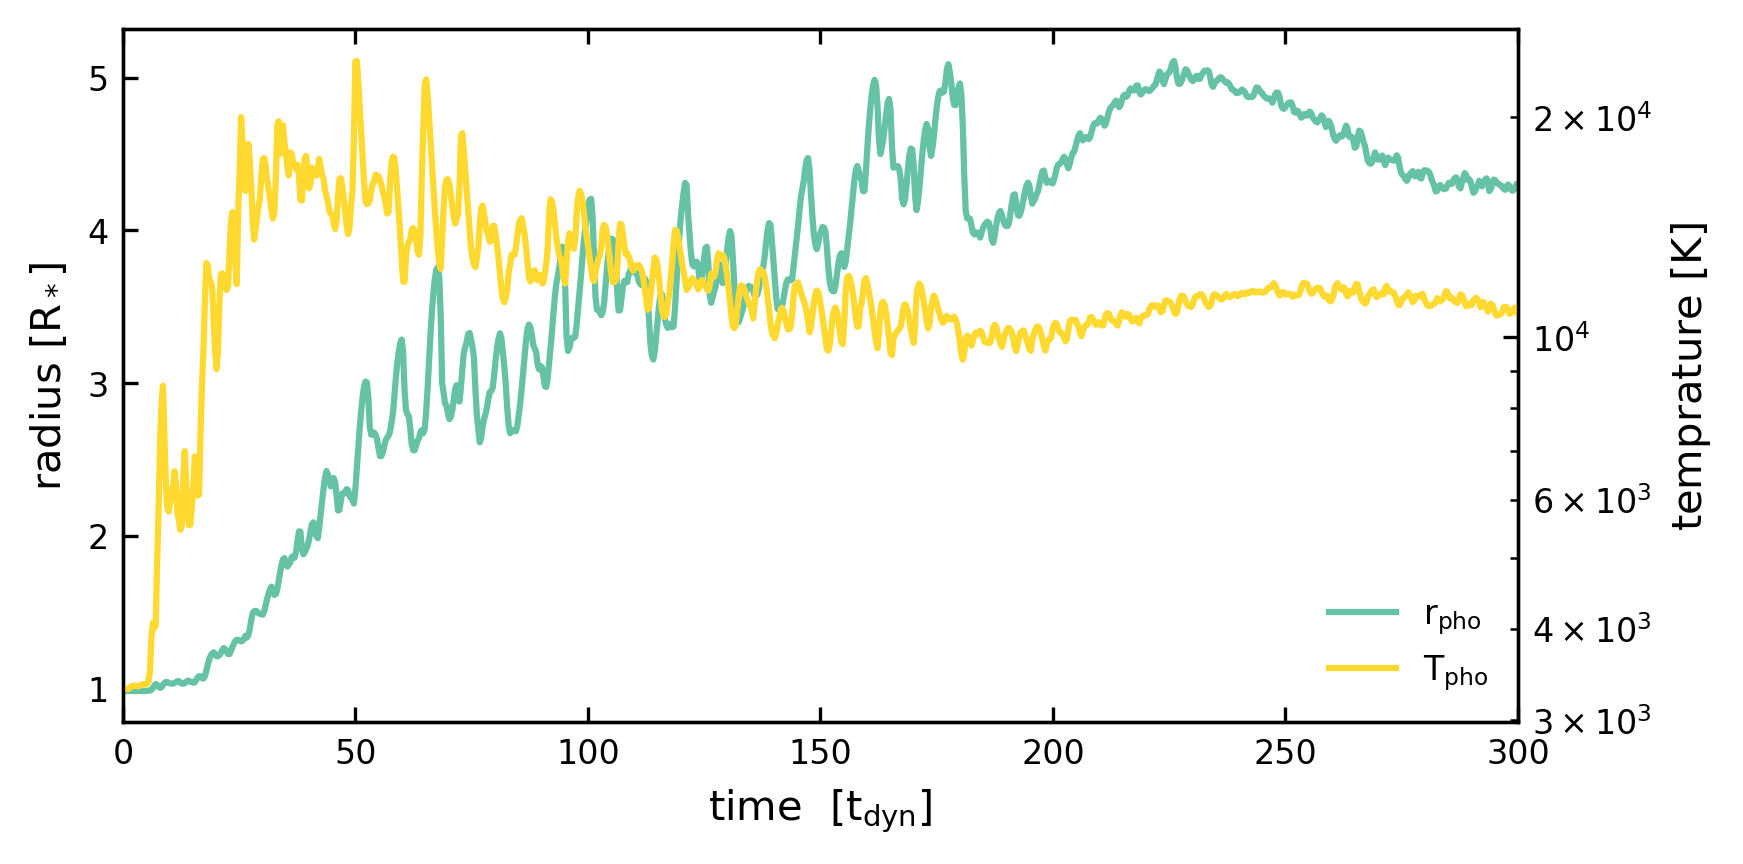

In [29]:
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
#ax.plot(np.array(time_lc_8)/t_dyn_polytrope,np.array(radii_aver_8)/r_polytrope)#, label='polytrope')

ax.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(radii_aver_39)/r_giant,'#66c2a5')

#ax_r.plot(np.array(time_lc_8)/t_dyn_polytrope,np.array(temp_aver_8),'--')#, label='polytrope')

ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(temp_aver_39),'#ffd92f')
#ax.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)

ax.axvline(x=1e4, color='#66c2a5',label='$r_{pho}$')
ax.axvline(x=1e4, color='#ffd92f',label='$T_{pho}$')



ax.set_ylabel('$radius\\ [R_*]$', fontsize=10)
ax_r.set_ylabel('$temprature\\ [K]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)

ax_r.set_yscale('log')
ax.set_xlim(0,3e2)
#ax.set_ylim(1e0,1e2)
#ax_r.set_ylim(1e3,1e8)

ax.legend(frameon=False,loc='lower right')

plt.savefig('PEGMfig/pho_tem_radius.pdf', format='pdf', bbox_inches='tight')

In [8]:
temp_aver_39[20]

3318.7057846037796

reading orbit file for binary simulation...
tperi =  85800860.0
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00040.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00300.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00800.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00040.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00300.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...ge

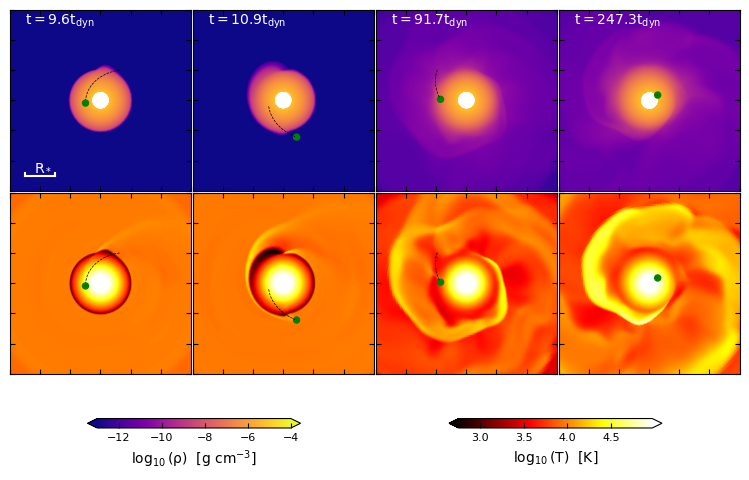

In [4]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00036"+".athdf",
            base_dir + "PEGM.out1."+"00040"+".athdf",
            base_dir + "PEGM.out1."+"00300"+".athdf",
            base_dir + "PEGM.out1."+"00800"+".athdf"
           ]
'''
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4])


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

cbar_ax1 = fig.add_axes([0.285, -0.005, 0.2, 0.02])
cbar_ax2 = fig.add_axes([0.54, -0.005, 0.2, 0.02])    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/r_giant, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/r_giant,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='plasma',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom',cax=cbar_ax1)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb1.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='white')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/r_giant,(y2-rcom[1])/r_giant],radius=0.1,color='g') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/r_giant,(orb[sel]['y']-orb[sel]['ycom'])/r_giant,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])
    
    if i ==0:
        grid[i].plot([-2.5,-1.5],[-2.5,-2.5],'w')
        grid[i].plot([-2.5,-2.5],[-2.5,-2.4],'w')
        grid[i].plot([-1.5,-1.5],[-2.5,-2.4],'w')
        grid[i].text(-2.2, -2.2,r'$R_*$',color='w', va='center', ha='left')
    
for i,myfile in enumerate(filelist):
    i+=4
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### temperature
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/r_giant, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/r_giant,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['press']/d['rho']*c.mp*1.25/2/c.kB)[:,thind,:]),np.nan ) ),
               cmap='hot',shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb2=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax2)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb2.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='k')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/r_giant,(y2-rcom[1])/r_giant],radius=0.1,color='g') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/r_giant,(orb[sel]['y']-orb[sel]['ycom'])/r_giant,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])

plt.savefig('PEGMfig/dens_temp.pdf', format='pdf', bbox_inches='tight')

In [22]:
def flux_radial(data,pho_radii,pho_id,wavelength,rescale_factor=1,lum_bolo=False, plot = True, temp_plot = True):
    """
    Synthetic photometry, Planck blackbody emission flux
    F=\sigma*T^4*d\theta*d\phi*sin(theta)*r^2
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    rho_star = data['rho']*data['r0']
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB
    pho_temp = np.zeros_like(pho_radii,dtype=float)
    flux = np.zeros_like(pho_radii,dtype=float)
    
    for ii in range(n_phi):
        for jj in range(n_theta):
            r_id = int(pho_id[ii,jj])
            pho_temp[ii,jj] = temp[ii,jj,r_id]
            
    area = np.pi/n_theta*2*np.pi/n_phi*np.outer(np.ones(n_phi),np.sin(data['x2v']))*pho_radii**2
    pho_aver_radii = np.sqrt(np.sum(area)/4/np.pi)
    
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    pho_aver_temp = (np.sum(flux)/np.sum(area)/c.sigmaSB)**0.25
    
    max_id = np.where(pho_temp==np.max(pho_temp))
    
    # plot
    if plot: 
        plt.imshow(flux.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Flux Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    if temp_plot:
        plt.imshow(pho_temp.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere temperature Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()

    return flux,pho_temp,pho_aver_radii,pho_aver_temp

reading orbit file for binary simulation...
tperi =  85800860.0
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00040.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/light_curve.py:125: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00600.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


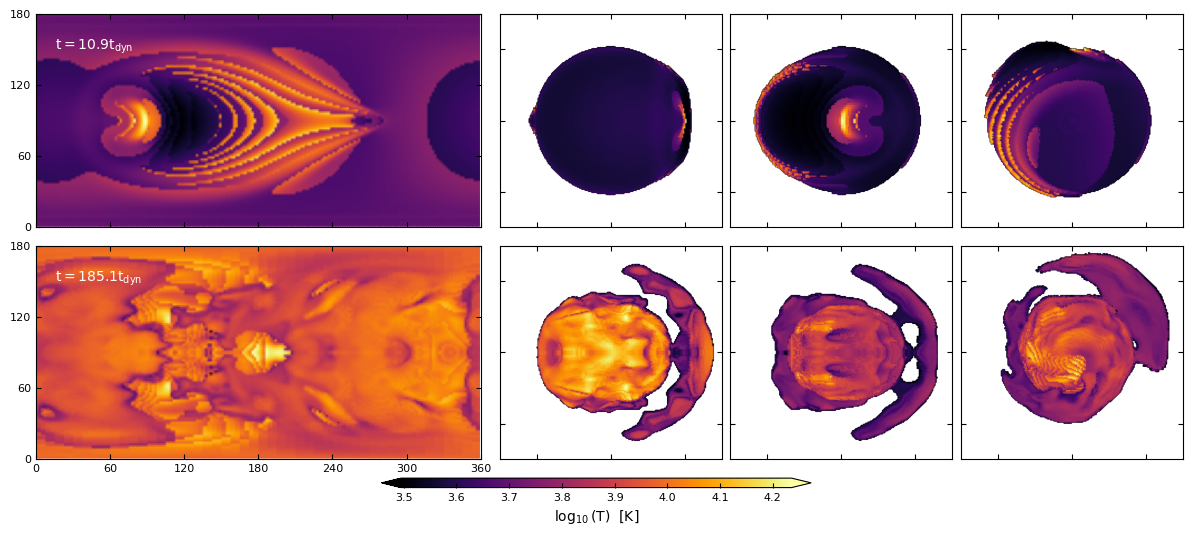

In [72]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00040"+".athdf",
            base_dir + "PEGM.out1."+"00600"+".athdf",
           ]

thind = 0
mylevel = None

fig = plt.figure(figsize=(300*fig_mm,120*fig_mm),layout="constrained")
ax_array = fig.subplots(2, 4, squeeze=False,width_ratios=[2, 1,1,1], height_ratios=[1, 1])
r0thresh = 0.

cbar_ax1 = fig.add_axes([0.3, -0.02, 0.4, 0.02])
#cbar_ax2 = fig.add_axes([0.54, -0.005, 0.4, 0.02])    


for i,myfile in enumerate(filelist):
    data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
    wavelength = 10
    
    #r direction
    op_radii,op_id = lc.optical_depth_radial(data, wavelength,plot=False)
    flux = flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True,plot=False, temp_plot = False)
    
    phi   = 360*(np.arange(np.shape(op_radii)[0])+0.5)/np.shape(op_radii)[0]
    theta = 180*(np.arange(np.shape(op_radii)[1])+0.5)/np.shape(op_radii)[1]
    phi_grid, theta_grid = np.meshgrid(phi,theta)

    im=ax_array[i, 0].pcolormesh(phi_grid, theta_grid,  np.log10(flux[1].T), cmap='inferno',shading='gouraud')

    fig.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax1)

    ax_array[0, 0].set_xticks([0,60,120,180,240,300,360], ["", "", "", "", "", "", ""])
    ax_array[1, 0].set_xticks([0,60,120,180,240,300,360])
    ax_array[i, 0].set_yticks([0,60,120,180])

    # x,y,z direction
    a=1.5*5**i
    for j,direction in enumerate(['x','y','z']):
        ob_grid=lc.observer_grid(200,box_half_length = a*100*c.rsun,direction=direction)
        pho_pos = lc.optical_depth(data,wavelength,ob_grid,direction=direction,plot=False)
        flux_1 = lc.temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction,plot=False)
    
        im=ax_array[i, j+1].pcolormesh(ob_grid[0,:,(1-(j+1)//2)]/100/c.rsun, ob_grid[:,0,(2-j//2)]/100/c.rsun, 
                              flux_1,cmap='inferno',shading='gouraud')
        
        ax_array[i, j+1].set_xticks([-2*5**i,-1*5**i,0,1*5**i,2*5**i], ["", "", "", "", ""])
        ax_array[i, j+1].set_yticks([-2*5**i,-1*5**i,0,1*5**i,2*5**i], ["", "", "", "", ""])
        ax_array[i, j+1].set_xlim(-a,a)
        ax_array[i, j+1].set_ylim(-a,a)
        
    ax_array[i, 0].annotate(r"$t=$"+str(round((data['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (15, 150),color='white')
    ax_array[i, 1].plot([-1.25*5**i,-0.25*5**i],[-1.25*5**i,-1.25*5**i],'w')
    ax_array[i, 1].plot([-1.25*5**i,-1.25*5**i],[-1.25*5**i,-1.2*5**i],'w')
    ax_array[i, 1].plot([-0.25*5**i,-0.25*5**i],[-1.25*5**i,-1.2*5**i],'w')
    ax_array[i, 1].text(-0.8*5**i, -1.1*5**i,str(5**i)+r'$R_*$',color='w', va='center', ha='left')
    
plt.savefig('PEGMfig/pho_temp.pdf', format='pdf', bbox_inches='tight') 

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


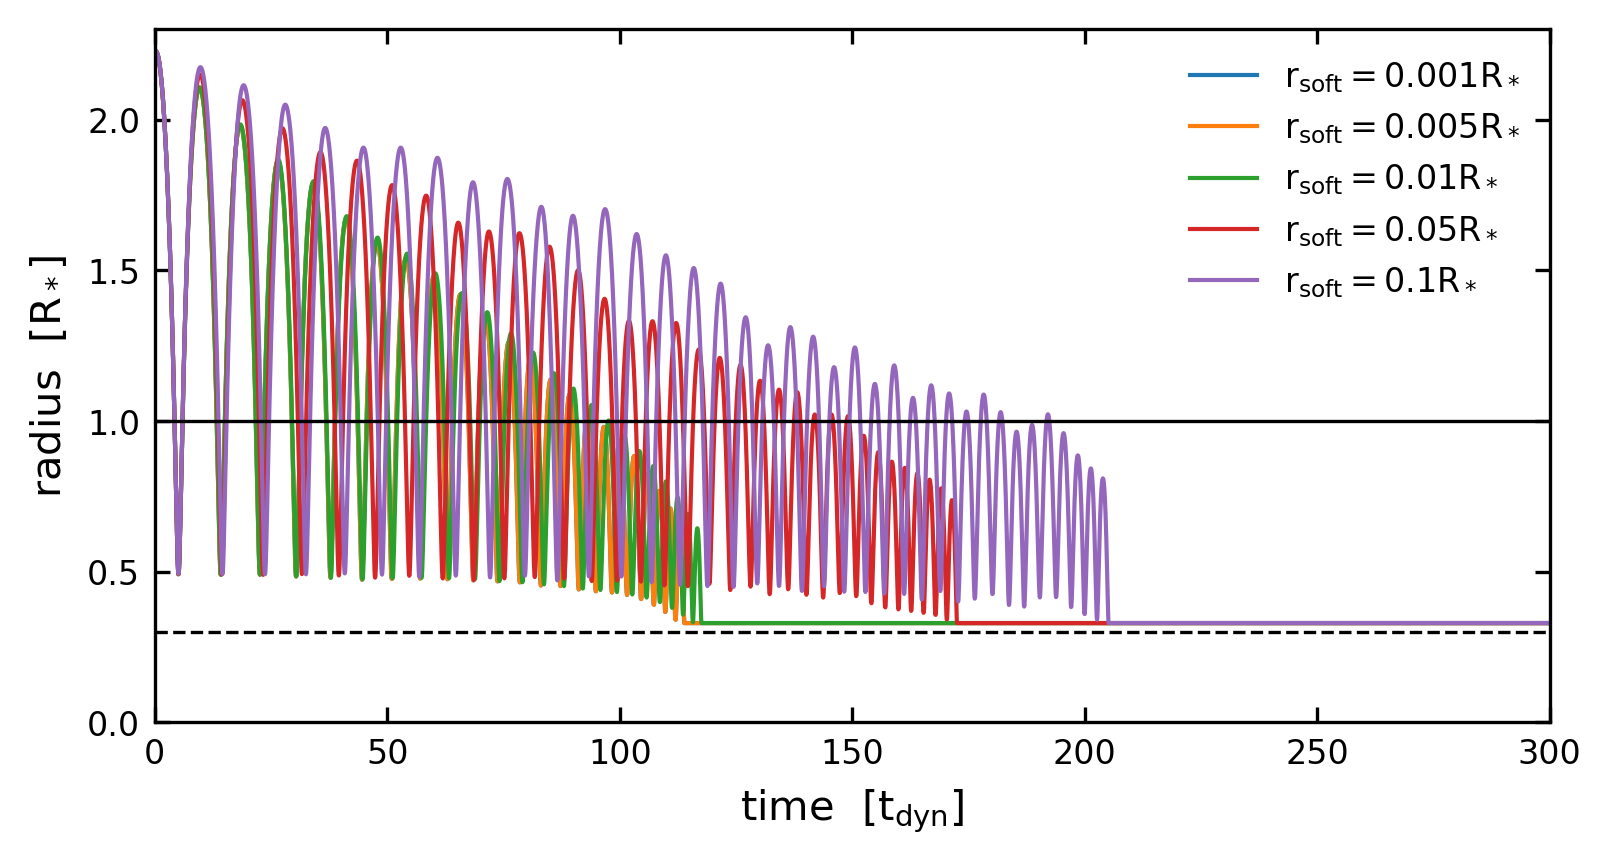

In [4]:
#plot the orbits

fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
#ax_r = ax.twinx()

#ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[19], label='LC')
giant = '../../data/planetary_engulfment_test44/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=1, label=r'$r_{soft}=0.001R_*$')
giant = '../../data/planetary_engulfment_test41/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=1, label=r'$r_{soft}=0.005R_*$')
giant = '../../data/planetary_engulfment_test45/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=1, label=r'$r_{soft}=0.01R_*$')
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=1, label=r'$r_{soft}=0.05R_*$')
giant = '../../data/planetary_engulfment_test43/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=1, label=r'$r_{soft}=0.1R_*$')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
#ax_r.set_ylabel('$Luminosity \ \ [a.u.]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
#ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
ax.legend(frameon=False,loc='upper right')
plt.savefig('PEGMfig/orbits_diff.pdf', format='pdf', bbox_inches='tight')


reading orbit file for binary simulation...


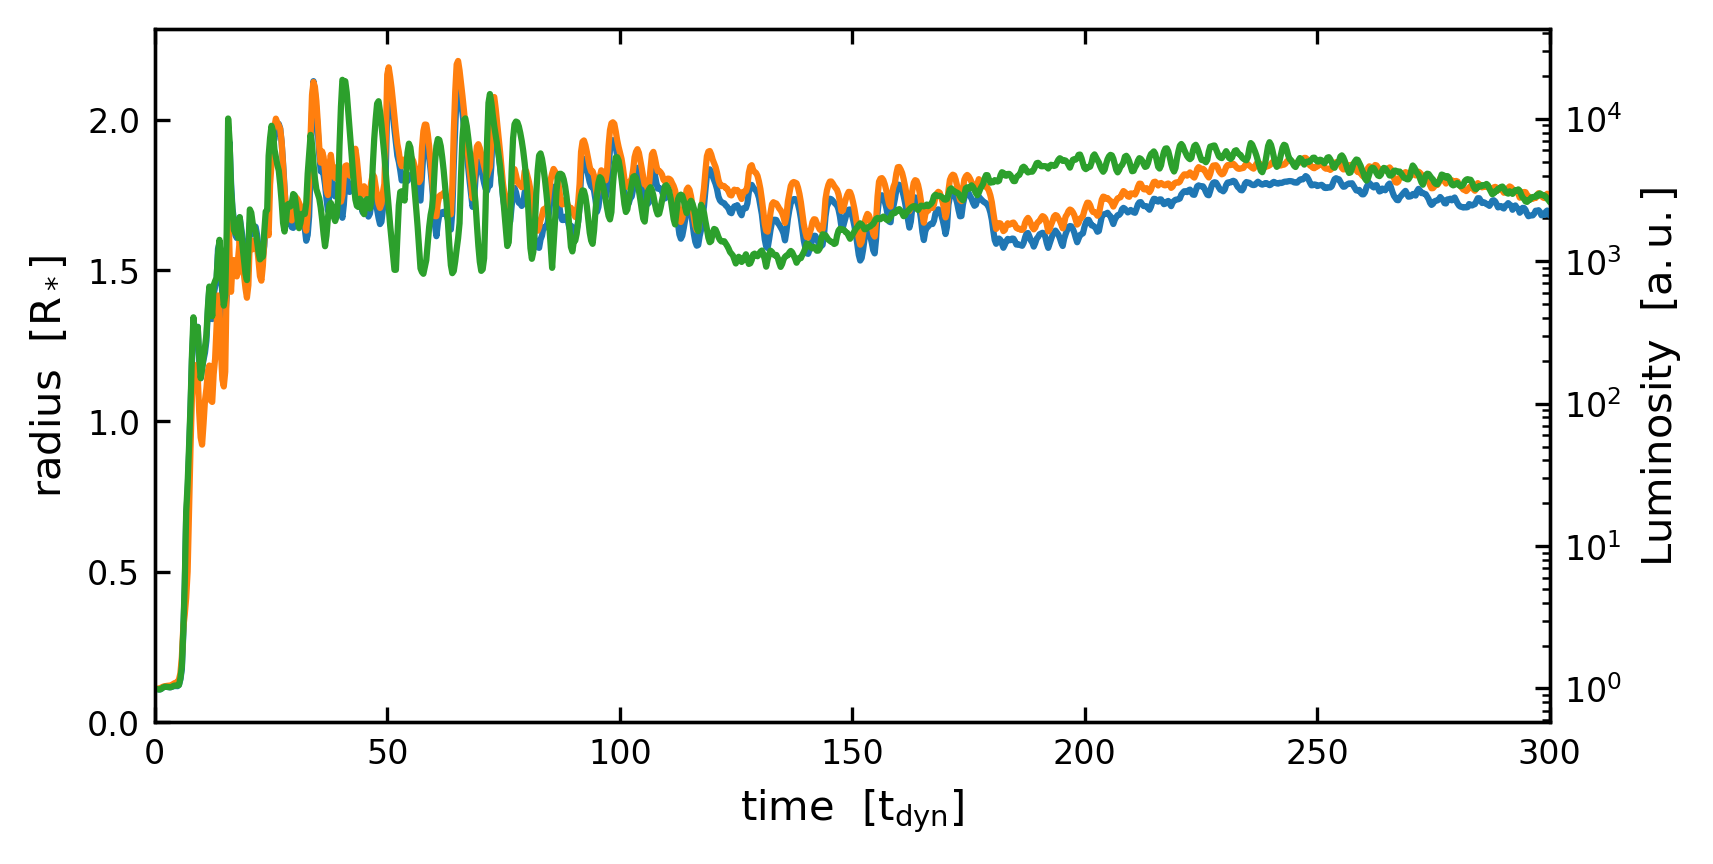

In [25]:
#plot the orbits
giant = '../../data/planetary_engulfment_test39/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
#ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant, lw=0.8, label='orbital decay')
ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(int_lum_39)/int_lum_39[19], label='39')
ax_r.plot(np.array(time_lc_40)/t_dyn_giant-6,np.array(int_lum_40)/int_lum_40[19], label='40')
ax_r.plot(np.array(time_lc_41)/t_dyn_giant-6,np.array(int_lum_41)/int_lum_41[19], label='41')

#ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
#ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Luminosity \ \ [a.u.]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')

plt.savefig('PEGMfig/lc_diff.pdf', format='pdf', bbox_inches='tight')


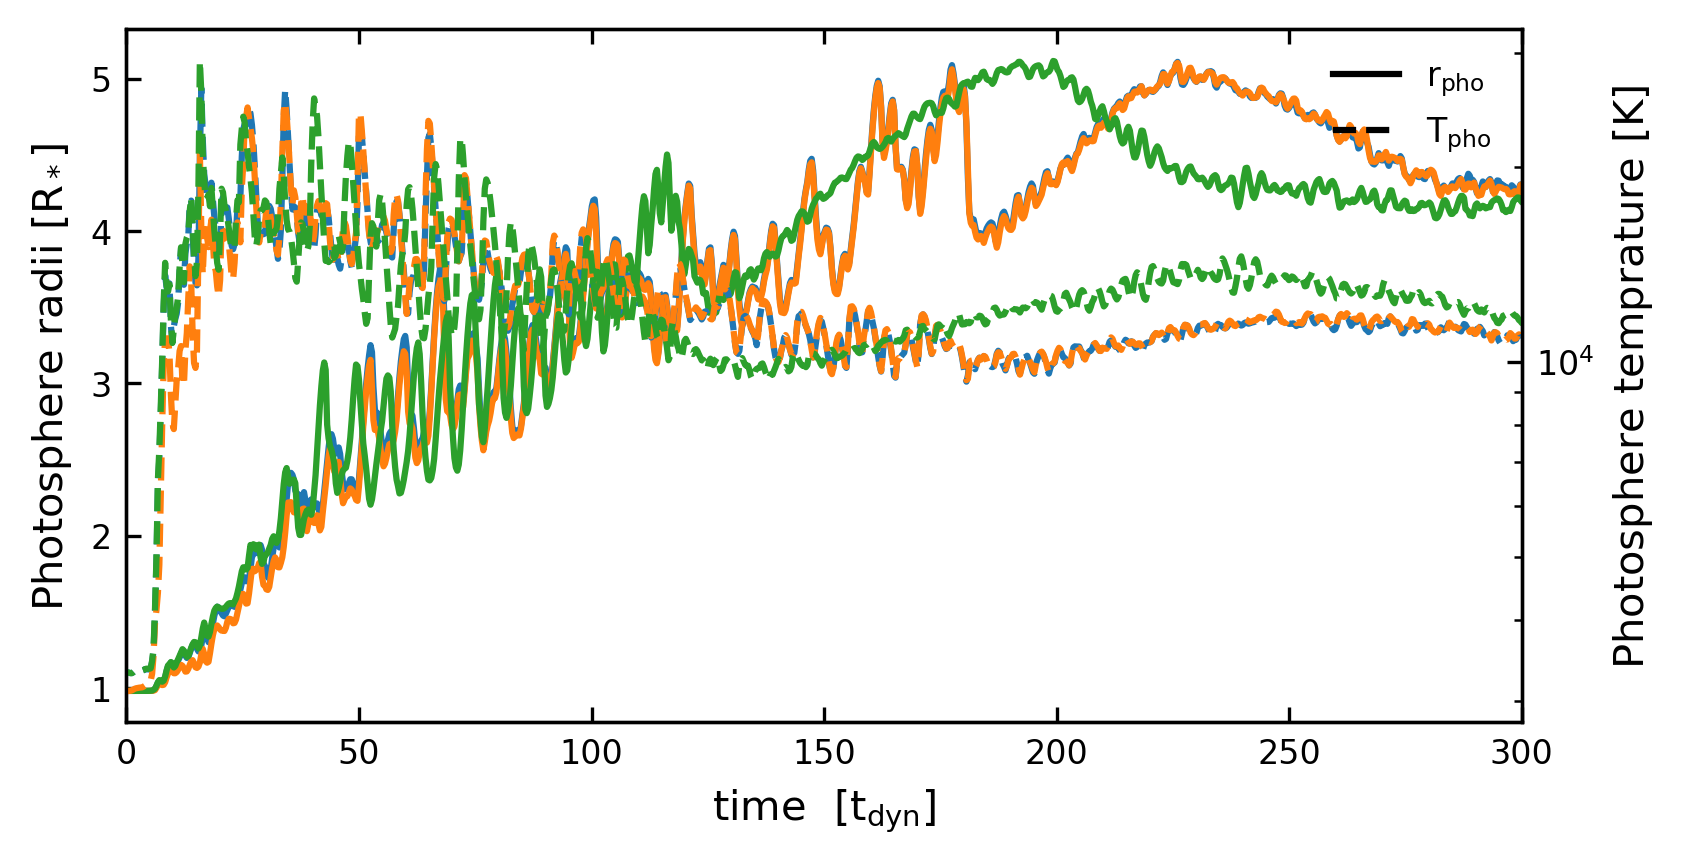

In [29]:
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()

ax.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(radii_aver_39)/r_giant)#, label='giant star')
ax_r.plot(np.array(time_lc_39)/t_dyn_giant-6,np.array(temp_aver_39), '--')#,label='giant star')

ax.plot(np.array(time_lc_40)/t_dyn_giant-6,np.array(radii_aver_40)/r_giant)#, label='giant star')
ax_r.plot(np.array(time_lc_40)/t_dyn_giant-6,np.array(temp_aver_40), '--')#,label='giant star')

ax.plot(np.array(time_lc_41)/t_dyn_giant-6,np.array(radii_aver_41)/r_giant)#, label='giant star')
ax_r.plot(np.array(time_lc_41)/t_dyn_giant-6,np.array(temp_aver_41), '--')#,label='giant star')
#ax.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)
ax.axvline(x=1e4, color='#000000',label='$r_{pho}$')
ax.axvline(x=1e4, color='#000000',ls='--',label='$T_{pho}$')


ax.set_ylabel('$Photosphere\\ radii\\ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Photosphere\\ temprature\\ [K]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)

ax_r.set_yscale('log')
ax.set_xlim(0,3e2)
#ax.set_ylim(1e0,1e2)
#ax_r.set_ylim(1e3,1e8)

ax.legend(frameon=False,loc='upper right')
plt.savefig('PEGMfig/pho_tem_radius_diff.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...


/tmp/ipykernel_621440/2461410728.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax4.set_ylim(0,2e-8)


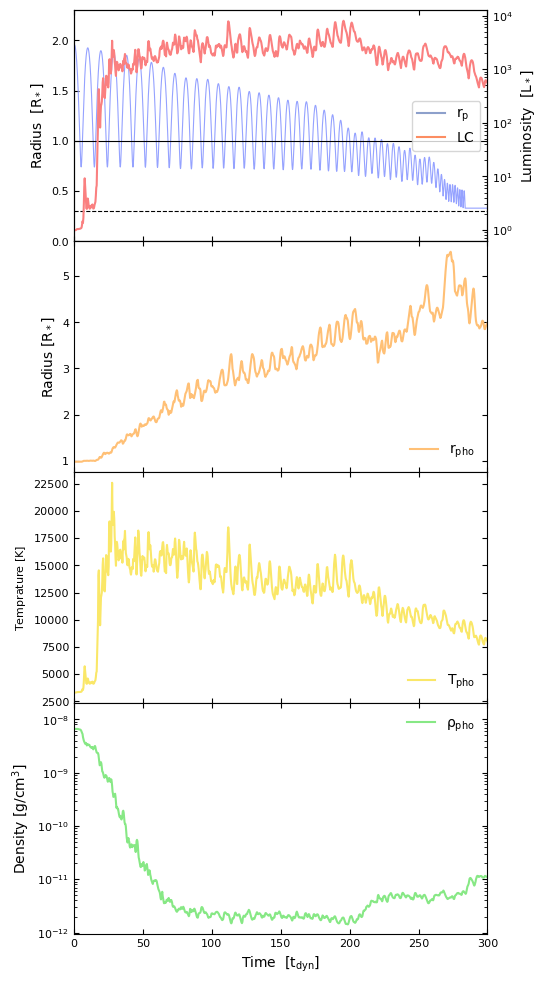

In [11]:
giant = '../../data/planetary_engulfment_test42/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(16/3,12))
gs = fig.add_gridspec(4, 1, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4) = gs.subplots(sharex='col')


ax1_r = ax1.twinx()
ax1.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'#95a2ff', lw=0.8)
ax1_r.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(int_lum_42)/int_lum_42[20],'#fa8080', label='LC')

ax1.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax1.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax1.set_ylabel('$Radius \ \ [R_*]$', fontsize=10)
ax1_r.set_ylabel('$Luminosity \ \ [L_*]$', fontsize=10)

#ax1.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax1.set_xlim(0,300)
ax1.set_ylim(0,2.3)

ax1_r.set_yscale('log')
ax1.axvline(x=1e4, color='#8da0cb',label=r'$r_p$')
ax1.axvline(x=1e4, color='#fc8d62',label=r'$LC$')
ax1.legend(loc='center right', fontsize=10, facecolor='white')


#figure2
ax2.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(radii_aver_42)/r_giant,'#ffc076',label=r'$r_{pho}$')

ax2.set_ylabel('$Radius\\ [R_*]$', fontsize=10)
ax2.set_xlim(0,3e2)

ax2.legend(frameon=False,loc='lower right', fontsize=10)

#figure3
ax3.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(temp_aver_42),'#fae768',label=r'$T_{pho}$')
ax3.set_ylabel('$Temprature\\ [K]$', fontsize=8)
ax3.set_xlim(0,3e2)

ax3.legend(frameon=False,loc='lower right', fontsize=10)

#figure4

ax4.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(rho_aver_42),'#87e885',label=r'$\rho_{pho}$')

ax4.set_ylabel('$Density\\ [g/cm^3]$', fontsize=10)
ax4.set_xlabel('$Time \ \ [t_{dyn}]$', fontsize=10)

ax4.set_yscale('log')
ax4.set_xlim(0,3e2)
ax4.set_ylim(0,2e-8)

ax4.legend(frameon=False,loc='upper right', fontsize=10)
plt.savefig('PEGMfig/orbit_RTD_lowe.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...


NameError: name 'time_lc_42' is not defined

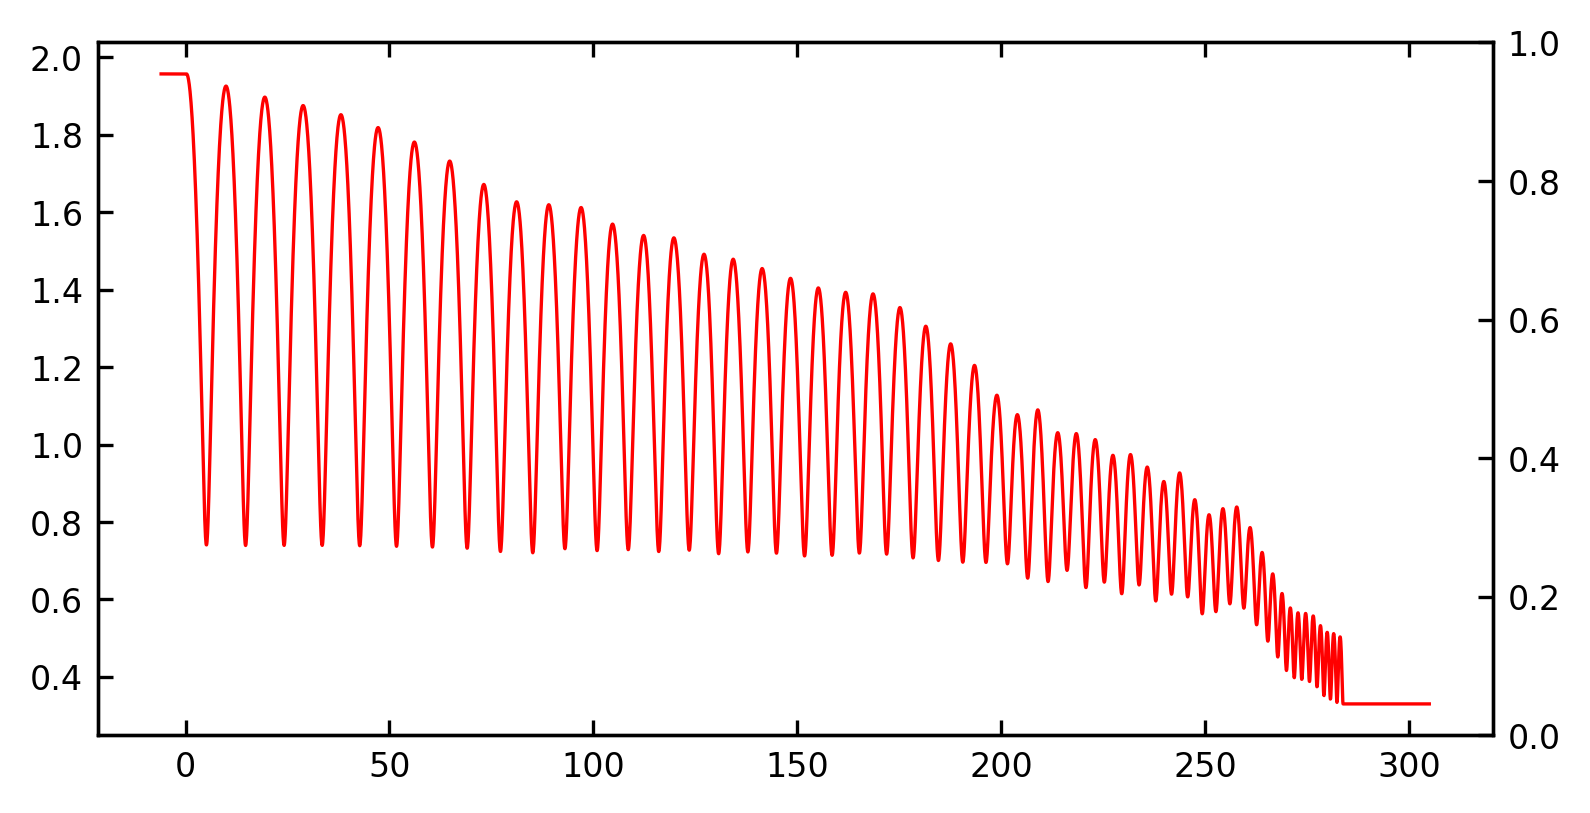

In [5]:
# ideal gas EOS

#plot the orbits
giant = '../../data/planetary_engulfment_test42/'
orb_giant = ou.read_trackfile(giant+"pm_trackfile.dat")
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
ax.plot(orb_giant['time'][:]/t_dyn_giant-6, orb_giant['sep'][:]/r_giant,'r', lw=0.8, label='orbital decay')
ax_r.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(int_lum_42)/int_lum_42[19], label='LC')

ax.axhline(y=1, color='#000000', linestyle='-', lw=0.8)
ax.axhline(y=0.3, color='#000000', linestyle='--', lw=0.8)

ax.set_ylabel('$radius \ \ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Luminosity \ \ [a.u.]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)
ax.set_xlim(0,300)
ax.set_ylim(0,2.3)

#ax.set_xscale('log')
ax_r.set_yscale('log')
#ax.tick_params(top=True, bottom=True, axis='x', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')
#ax.tick_params(right=True, left=True, axis='y', color='#000000', length=4, direction='in', width=1,
#                       grid_color='none')

plt.savefig('PEGMfig/orbit_le.pdf', format='pdf', bbox_inches='tight')
plt.show()

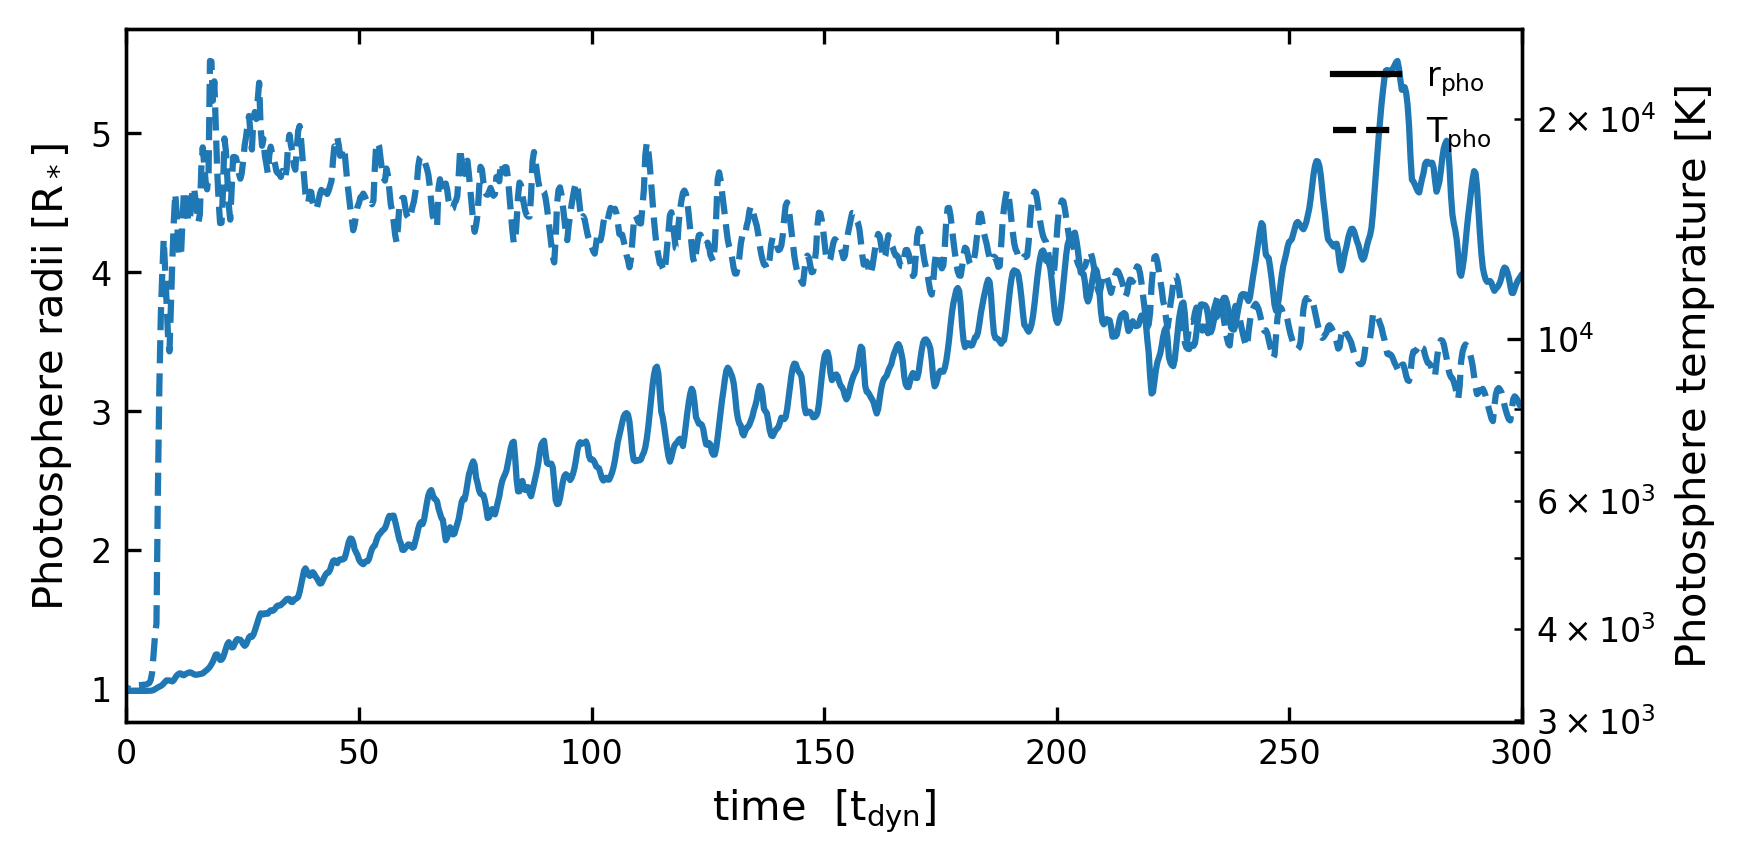

In [35]:
fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
ax_r = ax.twinx()
#ax.plot(np.array(time_lc_8)/t_dyn_polytrope,np.array(radii_aver_8)/r_polytrope)#, label='polytrope')

ax.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(radii_aver_42)/r_giant)#, label='giant star')

#ax_r.plot(np.array(time_lc_8)/t_dyn_polytrope,np.array(temp_aver_8),'--')#, label='polytrope')

ax_r.plot(np.array(time_lc_42)/t_dyn_giant-6,np.array(temp_aver_42), '--')#,label='giant star')
#ax.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)
ax.axvline(x=1e4, color='#000000',label='$r_{pho}$')
ax.axvline(x=1e4, color='#000000',ls='--',label='$T_{pho}$')


ax.set_ylabel('$Photosphere\\ radii\\ [R_*]$', fontsize=10)
ax_r.set_ylabel('$Photosphere\\ temprature\\ [K]$', fontsize=10)
ax.set_xlabel('$time \ \ [t_{dyn}]$', fontsize=10)

ax_r.set_yscale('log')
ax.set_xlim(0,3e2)
#ax.set_ylim(1e0,1e2)
#ax_r.set_ylim(1e3,1e8)

ax.legend(frameon=False,loc='upper right')
plt.savefig('PEGMfig/pho_tem_radius_le.pdf', format='pdf', bbox_inches='tight')

/tmp/ipykernel_2813398/1838776603.py:39: RuntimeWarning: invalid value encountered in divide
  ax2.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound_net[:,4*i]/delta_M_giant_net[:,4*i],label=r'$r=%.1f R_*$'%(rc_start+2*i))


(0.0, 300.0)

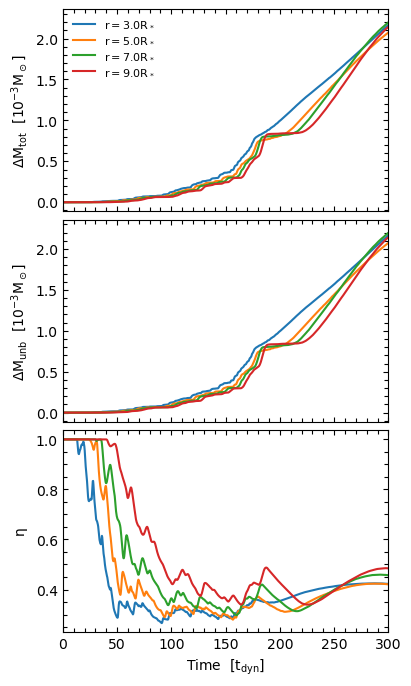

In [17]:
data_ml=np.loadtxt('PEGMfig/test39_ml.dat')
n_line_giant=19;rc_start = 1.0
time_post_giant=data_ml[:,0]; delta_M_giant=data_ml[:,1:20]; delta_M_giant_unbound=data_ml[:,20:39]; delta_M_giant_net=data_ml[:,39:58];delta_M_giant_unbound_net=data_ml[:,58:77]

# plot mass loss vs. time
fig = plt.figure(figsize=(4,6.75),layout="constrained")
ax = fig.add_subplot(311)

#ax.plot(time_post_poly/t_dyn_polytrope,delta_M_poly[:,2]/c.msun*1e4,label='polytrope')
#ax.plot(time_post_solar/t_dyn_solar,delta_M_solar[:,2]/c.msun*1e4,label='solar-type')
for i in range(1,round(n_line_giant/4)):
    ax.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound_net[:,4*i]/c.msun*1e3,label=r'$r=%.1f R_*$'%(rc_start+2*i))

#ax.set_xlabel(r'$time \ \ [t_{dyn}]$')
ax.set_ylabel(r'$\Delta M_{tot} \ \ [10^{-3} M_\odot]$')

ax.set_xlim(0,300)
ax.set_xticks([0,50,100,150,200,250,300], ["", "", "", "", "", "", ""])
#ax.set_ylim(0,2.5)

legend = ax.legend(frameon=False, fontsize=8)
ax1 = fig.add_subplot(312)

#ax.plot(time_post_poly/t_dyn_polytrope,delta_M_poly[:,2]/c.msun*1e4,label='polytrope')
#ax.plot(time_post_solar/t_dyn_solar,delta_M_solar[:,2]/c.msun*1e4,label='solar-type')
for i in range(1,round(n_line_giant/4)):
    ax1.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound[:,4*i]/c.msun*1e3,label=r'$r=%.1f R_*$'%(rc_start+2*i))


ax1.set_ylabel(r'$\Delta M_{unb} \ \ [10^{-3} M_\odot]$')

ax1.set_xlim(0,300)
ax1.set_xticks([0,50,100,150,200,250,300], ["", "", "", "", "", "", ""])
#ax1.set_ylim(0,1.5)

ax2 = fig.add_subplot(313)

for i in range(1,round(n_line_giant/4)):
    ax2.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound_net[:,4*i]/delta_M_giant_net[:,4*i],label=r'$r=%.1f R_*$'%(rc_start+2*i))

ax2.set_xlabel(r'$Time \ \ [t_{dyn}]$')
ax2.set_ylabel(r'$\eta$')

ax2.set_xlim(0,300)
#ax.set_ylim(0,2.5)

# plt.savefig('PEGMfig/mass_loss.pdf', format='pdf', bbox_inches='tight')


In [4]:
import MassLoss as ml

giant = '../../data/planetary_engulfment_test42/'
plot_num = 1000; plot_interv = 1; rc_start = 2.0; rc_num = 17; rc_final=10.0;
ml_time_giant_unbound, ml_m_giant_unbound = ml.mass_loss(plot_num, plot_interv, rc_start, rc_num, rc_final,r_giant,gamma, giant,unbound=True)
ml_time_giant_bound, ml_m_giant_bound = ml.mass_loss(plot_num, plot_interv, rc_start, rc_num, rc_final,r_giant,gamma, giant,unbound=False)

# calculate the cumulated mass loss
time_post_giant = np.array(ml_time_giant_bound)
m_dot_time_post_giant = np.array(ml_m_giant_bound)
time_post_giant_unbound = np.array(ml_time_giant_unbound)
m_dot_time_post_giant_unbound = np.array(ml_m_giant_unbound)

n_time_giant = np.shape(m_dot_time_post_giant)[0]
n_line_giant = np.shape(m_dot_time_post_giant)[1]
delta_M_giant = np.zeros((n_time_giant,n_line_giant))
delta_M_giant_unbound = np.zeros((n_time_giant,n_line_giant))

for i in range(n_time_giant-1):
    delta_M_giant[i+1,:] = delta_M_giant[i,:]+(m_dot_time_post_giant[i,:]+m_dot_time_post_giant[i+1,:])/2*(time_post_giant[i+1]-time_post_giant[i])
    delta_M_giant_unbound[i+1,:] = delta_M_giant_unbound[i,:]+(m_dot_time_post_giant_unbound[i,:]+m_dot_time_post_giant_unbound[i+1,:])/2*(time_post_giant_unbound[i+1]-time_post_giant_unbound[i])
    

Constants defined...
../../data/planetary_engulfment_test42/PEGM.out1.00014.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00007.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00017.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00020.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00022.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00002.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00003.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00001.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00000.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00006.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00011.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00019.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00025.athdf file r

../../data/planetary_engulfment_test42/PEGM.out1.00215.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00217.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00214.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00216.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00218.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00219.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00220.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00222.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00221.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00224.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00226.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00223.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00228.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00429.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00434.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00428.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00426.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00431.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00433.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00435.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00430.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00436.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00438.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00439.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00440.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00443.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00643.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00644.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00645.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00646.athdf file readed...../../data/planetary_engulfment_test42/PEGM.out1.00648.athdf file readed...

../../data/planetary_engulfment_test42/PEGM.out1.00647.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00650.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00649.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00651.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00652.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00654.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00653.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00655.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00849.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00862.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00853.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00860.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00863.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00851.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00865.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00861.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00864.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00867.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00871.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00868.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00858.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00072.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00070.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00071.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00073.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00074.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00077.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00078.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00076.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00075.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00082.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00080.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00079.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00081.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00288.athdf file readed...../../data/planetary_engulfment_test42/PEGM.out1.00283.athdf file readed...

../../data/planetary_engulfment_test42/PEGM.out1.00287.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00286.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00285.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00292.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00289.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00291.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00290.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00296.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00295.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00294.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00297.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00498.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00499.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00502.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00500.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00506.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00501.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00505.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00504.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00503.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00507.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00509.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00508.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00510.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00712.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00714.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00715.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00713.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00716.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00719.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00717.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00720.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00721.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00718.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00722.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00725.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00724.athdf file readed...
../../data/p

../../data/planetary_engulfment_test42/PEGM.out1.00922.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00930.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00927.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00929.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00928.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00932.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00933.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00931.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00934.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00935.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00936.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00937.athdf file readed...
../../data/planetary_engulfment_test42/PEGM.out1.00939.athdf file readed...
../../data/p

/tmp/ipykernel_139080/1827040161.py:35: RuntimeWarning: invalid value encountered in divide
  ax2.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound[:,4*i]/delta_M_giant[:,4*i],label=r'$r=%.1f R_*$'%(rc_start+2*i))


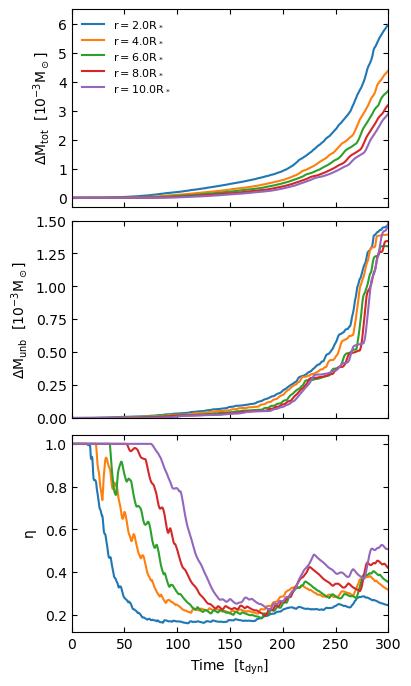

In [7]:

# plot mass loss vs. time
fig = plt.figure(figsize=(4,6.75),layout="constrained")
ax = fig.add_subplot(311)

#ax.plot(time_post_poly/t_dyn_polytrope,delta_M_poly[:,2]/c.msun*1e4,label='polytrope')
#ax.plot(time_post_solar/t_dyn_solar,delta_M_solar[:,2]/c.msun*1e4,label='solar-type')
for i in range(round(n_line_giant/4)+1):
    ax.plot(time_post_giant/t_dyn_giant-6,delta_M_giant[:,4*i]/c.msun*1e3,label=r'$r=%.1f R_*$'%(rc_start+2*i))

#ax.set_xlabel(r'$time \ \ [t_{dyn}]$')
ax.set_ylabel(r'$\Delta M_{tot} \ \ [10^{-3} M_\odot]$')

ax.set_xlim(0,300)
ax.set_xticks([0,50,100,150,200,250,300], ["", "", "", "", "", "", ""])
#ax.set_ylim(0,2.5)

legend = ax.legend(frameon=False, fontsize=8)
ax1 = fig.add_subplot(312)

#ax.plot(time_post_poly/t_dyn_polytrope,delta_M_poly[:,2]/c.msun*1e4,label='polytrope')
#ax.plot(time_post_solar/t_dyn_solar,delta_M_solar[:,2]/c.msun*1e4,label='solar-type')
for i in range(round(n_line_giant/4)+1):
    ax1.plot(time_post_giant_unbound/t_dyn_giant-6,delta_M_giant_unbound[:,4*i]/c.msun*1e3,label=r'$r=%.1f R_*$'%(rc_start+2*i))


ax1.set_ylabel(r'$\Delta M_{unb} \ \ [10^{-3} M_\odot]$')

ax1.set_xlim(0,300)
ax1.set_xticks([0,50,100,150,200,250,300], ["", "", "", "", "", "", ""])
ax1.set_ylim(0,1.5)

ax2 = fig.add_subplot(313)

for i in range(round(n_line_giant/4)+1):
    ax2.plot(time_post_giant/t_dyn_giant-6,delta_M_giant_unbound[:,4*i]/delta_M_giant[:,4*i],label=r'$r=%.1f R_*$'%(rc_start+2*i))

ax2.set_xlabel(r'$Time \ \ [t_{dyn}]$')
ax2.set_ylabel(r'$\eta$')

ax2.set_xlim(0,300)
#ax.set_ylim(0,2.5)

plt.savefig('PEGMfig/mass_loss_lowe.pdf', format='pdf', bbox_inches='tight')
